<a href="https://colab.research.google.com/github/Thipwadee/Project2/blob/main/principal_component_analysisV_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedKFold
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from pandas.api.types import  CategoricalDtype


# machine learning model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression


In [ ]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_excel('/content/drive/My Drive/Paper/Data-Survey-13-7-2023.xlsx', skiprows = 1)
data

FileNotFoundError: ignored

In [ ]:
data = pd.read_excel('/content/Data-Survey-13-7-2023_1.xlsx', skiprows = 1)
data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Temp,...,อุณหภูมิ,ความชื้น,กระแสลม,ความแรงของแสงแดด,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1
0,1,2022-12-28 00:00:00,ชาย,27,49.0,169.0,17.156262,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,2,1,2,3,2,0,-1,0,-1,0
1,2,2022-12-28 00:00:00,ชาย,36,71.0,175.0,23.183673,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,3,0,5,3,1,0,0,1,-1,0
2,3,2022-12-28 00:00:00,หญิง,25,89.0,153.0,38.019565,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,2,0,4,1,1,0,0,0,0,0
3,4,2022-12-28 00:00:00,ชาย,29,75.0,165.0,27.548209,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,3,3,4,4,2,-1,0,0,-1,1
4,5,2022-12-28 00:00:00,ชาย,28,118.0,187.0,33.744173,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,2,1,4,3,0,-1,-1,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,189,13/05/2023,ชาย,37,88.0,180.0,27.160494,ภายใต้อาคาร,16.26,35.6,...,3,2,4,3,2,-1,1,0,-1,-1
189,190,13/05/2023,หญิง,23,47.0,159.0,18.591037,ภายใต้อาคาร,16.26,35.6,...,3,1,4,3,4,-1,1,1,-1,-1
190,191,13/05/2023,ชาย,27,47.0,169.0,16.456006,ภายใต้อาคาร,16.26,35.6,...,4,4,4,5,3,-1,-1,1,-1,-1
191,192,13/05/2023,ชาย,57,68.0,171.0,23.255019,ภายใต้อาคาร,16.26,35.6,...,3,1,5,0,3,-1,1,1,-1,-1


In [ ]:
data.rename(columns = {'Unnamed: 0' : 'No', 'Unnamed: 1' : 'Date', 'Unnamed: 2' : 'เพศ', 'Unnamed: 3' : 'Age', 'Unnamed: 4' : 'Weight',
                       'Unnamed: 5' : 'Height', 'Unnamed: 6' : 'BMI', 'Unnamed: 7' : 'พื้นที่ทำแบบสอบถาม', 'Unnamed: 8' : 'เวลา',
                       '%RH' : 'RH','V (m/s)' : 'V','Unnamed: 18' : 'Thermal_acceptance', 'Unnamed: 26' : 'Thermal_sensation_Vote'
                       }, inplace = True)
data

,No,Date,เพศ,Age,Weight,Height,BMI,พื้นที่ทำแบบสอบถาม,เวลา,Temp,...,อุณหภูมิ,ความชื้น,กระแสลม,ความแรงของแสงแดด,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1
0,1,2022-12-28 00:00:00,ชาย,27,49.0,169.0,17.156262,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,2,1,2,3,2,0,-1,0,-1,0
1,2,2022-12-28 00:00:00,ชาย,36,71.0,175.0,23.183673,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,3,0,5,3,1,0,0,1,-1,0
2,3,2022-12-28 00:00:00,หญิง,25,89.0,153.0,38.019565,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,2,0,4,1,1,0,0,0,0,0
3,4,2022-12-28 00:00:00,ชาย,29,75.0,165.0,27.548209,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,3,3,4,4,2,-1,0,0,-1,1
4,5,2022-12-28 00:00:00,ชาย,28,118.0,187.0,33.744173,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,2,1,4,3,0,-1,-1,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,189,13/05/2023,ชาย,37,88.0,180.0,27.160494,ภายใต้อาคาร,16.26,35.6,...,3,2,4,3,2,-1,1,0,-1,-1
189,190,13/05/2023,หญิง,23,47.0,159.0,18.591037,ภายใต้อาคาร,16.26,35.6,...,3,1,4,3,4,-1,1,1,-1,-1
190,191,13/05/2023,ชาย,27,47.0,169.0,16.456006,ภายใต้อาคาร,16.26,35.6,...,4,4,4,5,3,-1,-1,1,-1,-1
191,192,13/05/2023,ชาย,57,68.0,171.0,23.255019,ภายใต้อาคาร,16.26,35.6,...,3,1,5,0,3,-1,1,1,-1,-1


In [ ]:
data.shape

(193, 37)

In [ ]:
data.columns

Index([                    'No',                   'Date',
                          'เพศ',                    'Age',
                       'Weight',                 'Height',
                          'BMI',     'พื้นที่ทำแบบสอบถาม',
                         'เวลา',                   'Temp',
                   'Globe temp',                     'RH',
                            'V',               'วงเล็บ 1',
                'สมการหลัง บวก',               'วงเล็บ 2',
       'ยกกำลัง 1 ส่วน 4/ 0.25',              'ลบ 273.15',
           'Thermal_acceptance',                       -3,
                             -2,                       -1,
                              0,                     '+1',
                           '+2',                     '+3',
       'Thermal_sensation_Vote',               'อุณหภูมิ',
                     'ความชื้น',                'กระแสลม',
             'ความแรงของแสงแดด',    'เหงื่อบริเวณผิวหนัง',
                     'ความร้อน',             'ความชื้น.1

In [ ]:
data.describe()

,No,Age,Weight,Height,BMI,Temp,Globe temp,RH,V,วงเล็บ 1,...,อุณหภูมิ,ความชื้น,กระแสลม,ความแรงของแสงแดด,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1
count,193.000000,193.000000,191.000000,191.000000,191.000000,193.000000,193.000000,193.000000,193.000000,1.930000e+02,...,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,97.000000,30.720207,68.544503,167.335079,24.364324,30.895337,31.533161,48.780829,0.265311,8.621030e+09,...,2.559585,1.989637,2.414508,2.207254,2.129534,-0.647668,-0.103627,0.637306,-0.419689,-0.450777
std,55.858452,11.950177,22.407397,9.767442,7.126414,2.310264,2.432899,7.491418,0.285395,2.756796e+08,...,1.667028,1.454124,1.404679,2.010014,1.941544,0.510522,0.558679,0.543002,0.554363,0.558002
min,1.000000,20.000000,41.000000,144.000000,16.015625,27.200000,27.600000,38.100000,0.045000,8.181304e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,49.000000,25.000000,49.000000,158.500000,19.146722,29.100000,29.800000,42.500000,0.120000,8.423330e+09,...,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000
50%,97.000000,27.000000,63.000000,169.000000,22.230987,30.800000,31.800000,46.600000,0.185000,8.647977e+09,...,2.000000,2.000000,2.000000,2.000000,2.000000,-1.000000,0.000000,1.000000,0.000000,0.000000
75%,145.000000,36.000000,76.500000,173.500000,27.548209,32.700000,33.100000,56.100000,0.330000,8.796388e+09,...,4.000000,3.000000,3.000000,4.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,193.000000,70.000000,147.000000,187.000000,48.553310,35.600000,36.200000,64.200000,1.765000,9.157997e+09,...,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##ดูค่าว่าง

In [ ]:
data.isnull().sum()

No                          0
Date                        0
เพศ                         0
Age                         0
Weight                      2
Height                      2
BMI                         2
พื้นที่ทำแบบสอบถาม          0
เวลา                        0
Temp                        0
Globe temp                  0
RH                          0
V                           0
วงเล็บ 1                    0
สมการหลัง บวก               0
วงเล็บ 2                    0
ยกกำลัง 1 ส่วน 4/ 0.25      0
ลบ 273.15                   0
Thermal_acceptance          0
-3                        193
-2                        189
-1                        154
0                         134
+1                        140
+2                        171
+3                        177
Thermal_sensation_Vote      0
อุณหภูมิ                    0
ความชื้น                    0
กระแสลม                     0
ความแรงของแสงแดด            0
เหงื่อบริเวณผิวหนัง         0
ความร้อน                    0
ความชื้น.1

#Data Cleaning

จัดการกับค่าว่างด้วย KNN

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
imputed = imputer.fit_transform(data[['Weight', 'Height']])
imputed[163:168]


array([[ 78.        , 185.        ],
       [ 65.        , 169.        ],
       [ 68.54450262, 167.33507853],
       [ 64.        , 154.        ],
       [ 65.        , 150.        ]])

In [ ]:
imputed[123:130]

array([[ 49.        , 169.        ],
       [ 46.        , 155.        ],
       [ 63.        , 173.        ],
       [ 89.        , 153.        ],
       [ 68.54450262, 167.33507853],
       [ 62.        , 163.        ],
       [ 60.        , 155.        ]])

In [ ]:
data.Weight.fillna(68, inplace=True)
data.Height.fillna(167, inplace=True)

In [ ]:
BMI1 = 68/(1.67**2)
BMI1

24.38237297859371

In [ ]:
data.BMI.fillna(BMI1, inplace=True)

In [ ]:

data[125:130]

,No,Date,เพศ,Age,Weight,Height,BMI,พื้นที่ทำแบบสอบถาม,เวลา,Temp,...,อุณหภูมิ,ความชื้น,กระแสลม,ความแรงของแสงแดด,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1
125,126,2023-01-06 00:00:00,ชาย,20,63.0,173.0,21.049818,ภายนอก / ใต้ร่มไม้,15:44 PM,30.2,...,2,4,0,0,4,-1,-1,1,0,0
126,127,2023-01-06 00:00:00,หญิง,25,89.0,153.0,38.019565,ภายนอก / ใต้ร่มไม้,15:44 PM,30.2,...,1,0,1,1,2,0,0,1,0,-1
127,128,13/05/2023,ชาย,57,68.0,167.0,24.382373,ภายใต้อาคาร,11.50 AM,32.7,...,3,4,2,3,3,-1,0,1,0,-1
128,129,13/05/2023,ชาย,56,62.0,163.0,23.335466,ภายใต้อาคาร,11.50 AM,32.7,...,2,3,2,2,0,-1,0,1,-1,0
129,130,13/05/2023,หญิง,60,60.0,155.0,24.973985,ภายใต้อาคาร,11.58 AM,32.2,...,6,3,1,6,5,-1,-1,1,-1,-1


In [ ]:
data.isnull().sum()

No                          0
Date                        0
เพศ                         0
Age                         0
Weight                      0
Height                      0
BMI                         0
พื้นที่ทำแบบสอบถาม          0
เวลา                        0
Temp                        0
Globe temp                  0
RH                          0
V                           0
วงเล็บ 1                    0
สมการหลัง บวก               0
วงเล็บ 2                    0
ยกกำลัง 1 ส่วน 4/ 0.25      0
ลบ 273.15                   0
Thermal_acceptance          0
-3                        193
-2                        189
-1                        154
0                         134
+1                        140
+2                        171
+3                        177
Thermal_sensation_Vote      0
อุณหภูมิ                    0
ความชื้น                    0
กระแสลม                     0
ความแรงของแสงแดด            0
เหงื่อบริเวณผิวหนัง         0
ความร้อน                    0
ความชื้น.1

In [ ]:
data.describe()

,No,Age,Weight,Height,BMI,Temp,Globe temp,RH,V,วงเล็บ 1,...,อุณหภูมิ,ความชื้น,กระแสลม,ความแรงของแสงแดด,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,1.930000e+02,...,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,97.000000,30.720207,68.538860,167.331606,24.364511,30.895337,31.533161,48.780829,0.265311,8.621030e+09,...,2.559585,1.989637,2.414508,2.207254,2.129534,-0.647668,-0.103627,0.637306,-0.419689,-0.450777
std,55.858452,11.950177,22.290455,9.716496,7.089200,2.310264,2.432899,7.491418,0.285395,2.756796e+08,...,1.667028,1.454124,1.404679,2.010014,1.941544,0.510522,0.558679,0.543002,0.554363,0.558002
min,1.000000,20.000000,41.000000,144.000000,16.015625,27.200000,27.600000,38.100000,0.045000,8.181304e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,49.000000,25.000000,49.000000,159.000000,19.146722,29.100000,29.800000,42.500000,0.120000,8.423330e+09,...,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000
50%,97.000000,27.000000,63.000000,169.000000,22.343516,30.800000,31.800000,46.600000,0.185000,8.647977e+09,...,2.000000,2.000000,2.000000,2.000000,2.000000,-1.000000,0.000000,1.000000,0.000000,0.000000
75%,145.000000,36.000000,75.000000,173.000000,27.548209,32.700000,33.100000,56.100000,0.330000,8.796388e+09,...,4.000000,3.000000,3.000000,4.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,193.000000,70.000000,147.000000,187.000000,48.553310,35.600000,36.200000,64.200000,1.765000,9.157997e+09,...,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##ดูค่า Outlier

In [ ]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x78168b9897b0>,
 'caps': [<matplotlib.lines.Line2D at 0x78168b988a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x78168b989360>],
 'medians': [<matplotlib.lines.Line2D at 0x78168b98b550>],
 'fliers': [<matplotlib.lines.Line2D at 0x78168b98b1c0>],
 'means': []}

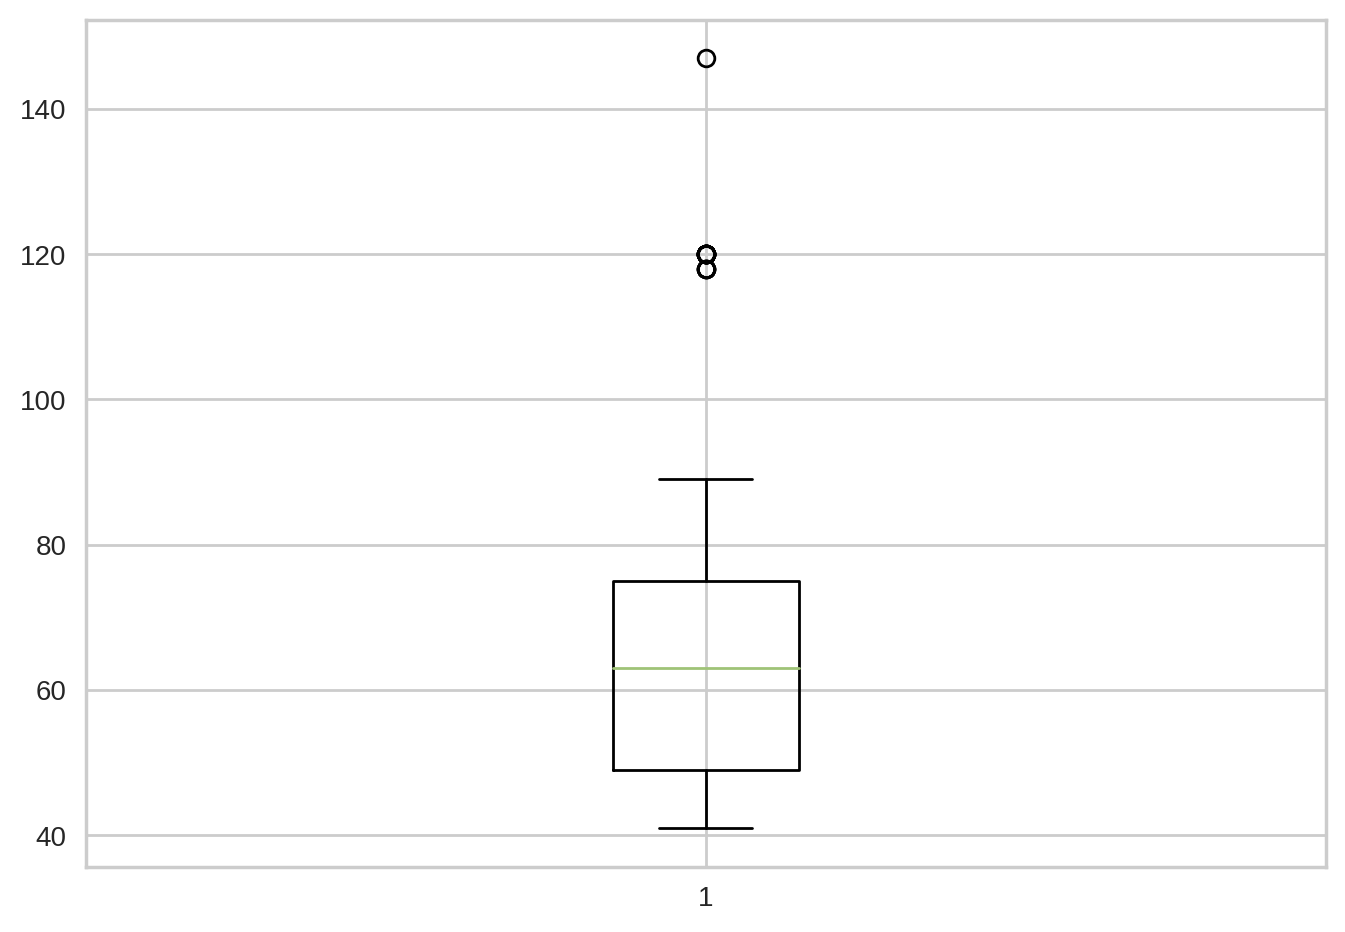

In [ ]:

plt.boxplot(data['Weight'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7816903401c0>,
 'caps': [<matplotlib.lines.Line2D at 0x781690340610>,
 'boxes': [<matplotlib.lines.Line2D at 0x781690341f60>],
 'medians': [<matplotlib.lines.Line2D at 0x781690343700>],
 'fliers': [<matplotlib.lines.Line2D at 0x7816903414b0>],
 'means': []}

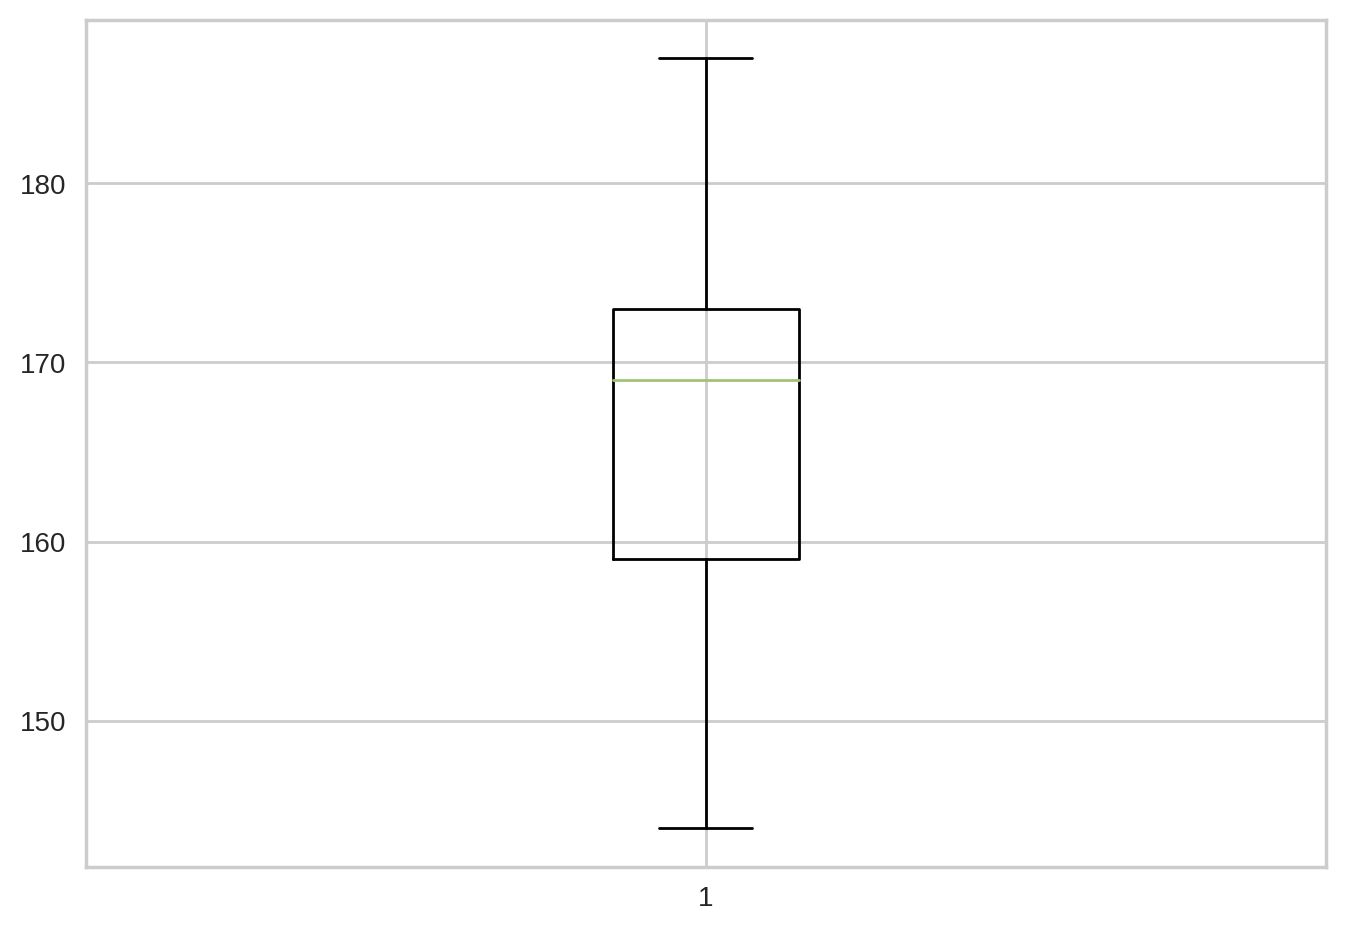

In [ ]:
plt.boxplot(data['Height'])

{'whiskers': [<matplotlib.lines.Line2D at 0x78168ba98fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x78168ba9b2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x78168ba994e0>],
 'medians': [<matplotlib.lines.Line2D at 0x78168b2d2f20>],
 'fliers': [<matplotlib.lines.Line2D at 0x78168b2d09d0>],
 'means': []}

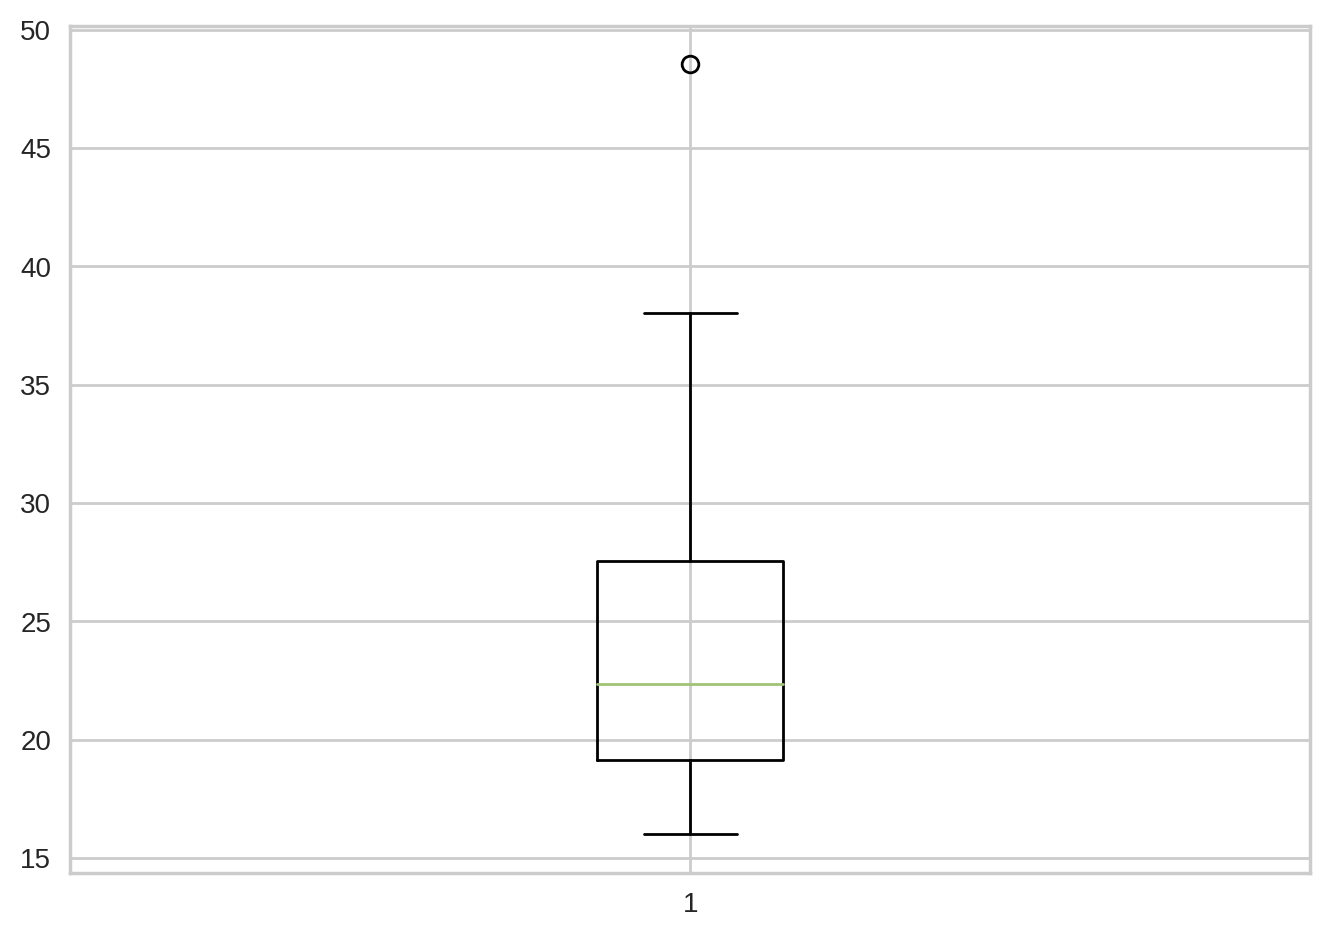

In [ ]:
plt.boxplot(data['BMI'])

#เพิ่มคอลัมน์ค่า TMRT clo และ met ตามลำดับ

In [ ]:
data["TMRT"] = data['ยกกำลัง 1 ส่วน 4/ 0.25'] - data['ลบ 273.15']
data["Clo"] = 0.55
data["Met"] =  1.2
data

,No,Date,เพศ,Age,Weight,Height,BMI,พื้นที่ทำแบบสอบถาม,เวลา,Temp,...,ความแรงของแสงแดด,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1,TMRT,Clo,Met
0,1,2022-12-28 00:00:00,ชาย,27,49.0,169.0,17.156262,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,3,2,0,-1,0,-1,0,30.628551,0.55,1.2
1,2,2022-12-28 00:00:00,ชาย,36,71.0,175.0,23.183673,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,3,1,0,0,1,-1,0,30.628551,0.55,1.2
2,3,2022-12-28 00:00:00,หญิง,25,89.0,153.0,38.019565,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,1,1,0,0,0,0,0,30.628551,0.55,1.2
3,4,2022-12-28 00:00:00,ชาย,29,75.0,165.0,27.548209,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,4,2,-1,0,0,-1,1,30.628551,0.55,1.2
4,5,2022-12-28 00:00:00,ชาย,28,118.0,187.0,33.744173,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,3,0,-1,-1,0,-1,0,30.628551,0.55,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,189,13/05/2023,ชาย,37,88.0,180.0,27.160494,ภายใต้อาคาร,16.26,35.6,...,3,2,-1,1,0,-1,-1,36.559615,0.55,1.2
189,190,13/05/2023,หญิง,23,47.0,159.0,18.591037,ภายใต้อาคาร,16.26,35.6,...,3,4,-1,1,1,-1,-1,36.559615,0.55,1.2
190,191,13/05/2023,ชาย,27,47.0,169.0,16.456006,ภายใต้อาคาร,16.26,35.6,...,5,3,-1,-1,1,-1,-1,36.559615,0.55,1.2
191,192,13/05/2023,ชาย,57,68.0,171.0,23.255019,ภายใต้อาคาร,16.26,35.6,...,0,3,-1,1,1,-1,-1,36.559615,0.55,1.2


In [ ]:
data.describe()

,No,Age,Weight,Height,BMI,Temp,Globe temp,RH,V,วงเล็บ 1,...,ความแรงของแสงแดด,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1,TMRT,Clo,Met
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,1.930000e+02,...,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,1.930000e+02,1.930000e+02
mean,97.000000,30.720207,68.538860,167.331606,24.364511,30.895337,31.533161,48.780829,0.265311,8.621030e+09,...,2.207254,2.129534,-0.647668,-0.103627,0.637306,-0.419689,-0.450777,31.777293,5.500000e-01,1.200000e+00
std,55.858452,11.950177,22.290455,9.716496,7.089200,2.310264,2.432899,7.491418,0.285395,2.756796e+08,...,2.010014,1.941544,0.510522,0.558679,0.543002,0.554363,0.558002,2.489153,1.113110e-16,2.226221e-16
min,1.000000,20.000000,41.000000,144.000000,16.015625,27.200000,27.600000,38.100000,0.045000,8.181304e+09,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,27.730857,5.500000e-01,1.200000e+00
25%,49.000000,25.000000,49.000000,159.000000,19.146722,29.100000,29.800000,42.500000,0.120000,8.423330e+09,...,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,30.211258,5.500000e-01,1.200000e+00
50%,97.000000,27.000000,63.000000,169.000000,22.343516,30.800000,31.800000,46.600000,0.185000,8.647977e+09,...,2.000000,2.000000,-1.000000,0.000000,1.000000,0.000000,0.000000,31.939186,5.500000e-01,1.200000e+00
75%,145.000000,36.000000,75.000000,173.000000,27.548209,32.700000,33.100000,56.100000,0.330000,8.796388e+09,...,4.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,33.219269,5.500000e-01,1.200000e+00
max,193.000000,70.000000,147.000000,187.000000,48.553310,35.600000,36.200000,64.200000,1.765000,9.157997e+09,...,6.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.559615,5.500000e-01,1.200000e+00


##drop คอลัมน์ -3 ถึง 3 และคอลัมน์สูตรในการคำนวณหา TMRT ออก

In [ ]:
data.drop([-3, -2, -1, 0, '+1', '+2', '+3'], axis=1, inplace=True)

In [ ]:

data.drop(['วงเล็บ 1', 'สมการหลัง บวก', 'วงเล็บ 2','ยกกำลัง 1 ส่วน 4/ 0.25', 'ลบ 273.15'  ], axis=1, inplace=True)

In [ ]:
data.shape

(193, 28)

In [ ]:
data.columns

Index(['No', 'Date', 'เพศ', 'Age', 'Weight', 'Height', 'BMI',
       'พื้นที่ทำแบบสอบถาม', 'เวลา', 'Temp', 'Globe temp', 'RH', 'V',
       'Thermal_acceptance', 'Thermal_sensation_Vote', 'อุณหภูมิ', 'ความชื้น',
       'กระแสลม', 'ความแรงของแสงแดด', 'เหงื่อบริเวณผิวหนัง', 'ความร้อน',
       'ความชื้น.1', 'กระแสลม.1', 'แสงแดด', 'เหงื่อบริเวณผิวหนัง.1', 'TMRT',
       'Clo', 'Met'],
      dtype='object')

##แทนค่าลักษณะของคำที่เหมือนกัน

In [ ]:
set(data['พื้นที่ทำแบบสอบถาม'])

{'ภายนอก / ใต้ร่มไม้',
 'ภายนอก กลางแจ้ง',
 'ภายนอก/ กลางแจ้ง',
 'ภายนอก/ มีหลังคาคลุม',
 'ภายใต้ร่มไม้',
 'ภายใต้อาคาร'}

In [ ]:
data['พื้นที่ทำแบบสอบถาม'][data['พื้นที่ทำแบบสอบถาม']=='ภายใต้ร่มไม้'] = 'ภายนอก / ใต้ร่มไม้'
data['พื้นที่ทำแบบสอบถาม'][data['พื้นที่ทำแบบสอบถาม']=='ภายนอก กลางแจ้ง'] = 'ภายนอก/ กลางแจ้ง'

<ipython-input-337-daf20139a280>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['พื้นที่ทำแบบสอบถาม'][data['พื้นที่ทำแบบสอบถาม']=='ภายใต้ร่มไม้'] = 'ภายนอก / ใต้ร่มไม้'
<ipython-input-337-daf20139a280>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['พื้นที่ทำแบบสอบถาม'][data['พื้นที่ทำแบบสอบถาม']=='ภายนอก กลางแจ้ง'] = 'ภายนอก/ กลางแจ้ง'


In [ ]:
set(data['พื้นที่ทำแบบสอบถาม'])

{'ภายนอก / ใต้ร่มไม้',
 'ภายนอก/ กลางแจ้ง',
 'ภายนอก/ มีหลังคาคลุม',
 'ภายใต้อาคาร'}

In [ ]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   No                      193 non-null    int64  
 1   Date                    193 non-null    object 
 2   เพศ                     193 non-null    object 
 3   Age                     193 non-null    int64  
 4   Weight                  193 non-null    float64
 5   Height                  193 non-null    float64
 6   BMI                     193 non-null    float64
 7   พื้นที่ทำแบบสอบถาม      193 non-null    object 
 8   เวลา                    193 non-null    object 
 9   Temp                    193 non-null    float64
 10  Globe temp              193 non-null    float64
 11  RH                      193 non-null    float64
 12  V                       193 non-null    float64
 13  Thermal_acceptance      193 non-null    object 
 14  Thermal_sensation_Vote  193 non-null    in

##เปลี่ยนวันที่เป็น datetime

In [ ]:
set(data['Date'])

{'13/05/2023',
 datetime.datetime(2022, 12, 28, 0, 0),
 datetime.datetime(2023, 1, 6, 0, 0),
 datetime.datetime(2023, 1, 8, 0, 0)}

In [ ]:
data['Date'] = pd.to_datetime(data.Date)

<ipython-input-341-2e81f6b9fef3>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data.Date)


In [ ]:
set(data['Date'])

{Timestamp('2022-12-28 00:00:00'),
 Timestamp('2023-01-06 00:00:00'),
 Timestamp('2023-01-08 00:00:00'),
 Timestamp('2023-05-13 00:00:00')}

In [ ]:
data['Date'] = pd.to_datetime(data.Date)

In [ ]:
conditions = [
    data.Date.dt.month.isin(np.arange(5,10)),
    (data.Date.dt.month.isin(np.arange(1,5))) | (data.Date.dt.month.isin(np.arange(10,13))),
]
choices = ['summer','winter']
data['seasons'] = np.select(conditions, choices)
data

,No,Date,เพศ,Age,Weight,Height,BMI,พื้นที่ทำแบบสอบถาม,เวลา,Temp,...,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1,TMRT,Clo,Met,seasons
0,1,2022-12-28,ชาย,27,49.0,169.0,17.156262,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,2,0,-1,0,-1,0,30.628551,0.55,1.2,winter
1,2,2022-12-28,ชาย,36,71.0,175.0,23.183673,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,1,0,0,1,-1,0,30.628551,0.55,1.2,winter
2,3,2022-12-28,หญิง,25,89.0,153.0,38.019565,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,1,0,0,0,0,0,30.628551,0.55,1.2,winter
3,4,2022-12-28,ชาย,29,75.0,165.0,27.548209,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,2,-1,0,0,-1,1,30.628551,0.55,1.2,winter
4,5,2022-12-28,ชาย,28,118.0,187.0,33.744173,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,0,-1,-1,0,-1,0,30.628551,0.55,1.2,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,189,2023-05-13,ชาย,37,88.0,180.0,27.160494,ภายใต้อาคาร,16.26,35.6,...,2,-1,1,0,-1,-1,36.559615,0.55,1.2,summer
189,190,2023-05-13,หญิง,23,47.0,159.0,18.591037,ภายใต้อาคาร,16.26,35.6,...,4,-1,1,1,-1,-1,36.559615,0.55,1.2,summer
190,191,2023-05-13,ชาย,27,47.0,169.0,16.456006,ภายใต้อาคาร,16.26,35.6,...,3,-1,-1,1,-1,-1,36.559615,0.55,1.2,summer
191,192,2023-05-13,ชาย,57,68.0,171.0,23.255019,ภายใต้อาคาร,16.26,35.6,...,3,-1,1,1,-1,-1,36.559615,0.55,1.2,summer


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   No                      193 non-null    int64         
 1   Date                    193 non-null    datetime64[ns]
 2   เพศ                     193 non-null    object        
 3   Age                     193 non-null    int64         
 4   Weight                  193 non-null    float64       
 5   Height                  193 non-null    float64       
 6   BMI                     193 non-null    float64       
 7   พื้นที่ทำแบบสอบถาม      193 non-null    object        
 8   เวลา                    193 non-null    object        
 9   Temp                    193 non-null    float64       
 10  Globe temp              193 non-null    float64       
 11  RH                      193 non-null    float64       
 12  V                       193 non-null    float64   

#One hot encoder

In [ ]:
df = {'ชาย':0, 'หญิง':1}
data = data.copy()
for i in range(2,3):
  data.iloc[:,i] = data.iloc[:,i].map(df)
data

<ipython-input-23-b05e707a5bb4>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,i] = data.iloc[:,i].map(df)


,No,Date,เพศ,Age,Weight,Height,BMI,พื้นที่ทำแบบสอบถาม,เวลา,Temp,...,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1,TMRT,Clo,Met,seasons
0,1,2022-12-28,0,27,49.0,169.0,17.156262,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,2,0,-1,0,-1,0,30.628551,0.55,1.2,winter
1,2,2022-12-28,0,36,71.0,175.0,23.183673,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,1,0,0,1,-1,0,30.628551,0.55,1.2,winter
2,3,2022-12-28,1,25,89.0,153.0,38.019565,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,1,0,0,0,0,0,30.628551,0.55,1.2,winter
3,4,2022-12-28,0,29,75.0,165.0,27.548209,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,2,-1,0,0,-1,1,30.628551,0.55,1.2,winter
4,5,2022-12-28,0,28,118.0,187.0,33.744173,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,0,-1,-1,0,-1,0,30.628551,0.55,1.2,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,189,2023-05-13,0,37,88.0,180.0,27.160494,ภายใต้อาคาร,16.26,35.6,...,2,-1,1,0,-1,-1,36.559615,0.55,1.2,summer
189,190,2023-05-13,1,23,47.0,159.0,18.591037,ภายใต้อาคาร,16.26,35.6,...,4,-1,1,1,-1,-1,36.559615,0.55,1.2,summer
190,191,2023-05-13,0,27,47.0,169.0,16.456006,ภายใต้อาคาร,16.26,35.6,...,3,-1,-1,1,-1,-1,36.559615,0.55,1.2,summer
191,192,2023-05-13,0,57,68.0,171.0,23.255019,ภายใต้อาคาร,16.26,35.6,...,3,-1,1,1,-1,-1,36.559615,0.55,1.2,summer


In [ ]:
df = {'ภายนอก / ใต้ร่มไม้':1, 'ภายนอก/ กลางแจ้ง':2, 'ภายนอก/ มีหลังคาคลุม':3, 'ภายใต้อาคาร':4}
data = data.copy()
for i in range(7,8):
  data.iloc[:,i] = data.iloc[:,i].map(df)
data

<ipython-input-24-288380ce0059>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,i] = data.iloc[:,i].map(df)


,No,Date,เพศ,Age,Weight,Height,BMI,พื้นที่ทำแบบสอบถาม,เวลา,Temp,...,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1,TMRT,Clo,Met,seasons
0,1,2022-12-28,0,27,49.0,169.0,17.156262,3,10:55 AM,30.5,...,2,0,-1,0,-1,0,30.628551,0.55,1.2,winter
1,2,2022-12-28,0,36,71.0,175.0,23.183673,3,10:55 AM,30.5,...,1,0,0,1,-1,0,30.628551,0.55,1.2,winter
2,3,2022-12-28,1,25,89.0,153.0,38.019565,3,10:55 AM,30.5,...,1,0,0,0,0,0,30.628551,0.55,1.2,winter
3,4,2022-12-28,0,29,75.0,165.0,27.548209,3,10:55 AM,30.5,...,2,-1,0,0,-1,1,30.628551,0.55,1.2,winter
4,5,2022-12-28,0,28,118.0,187.0,33.744173,3,10:55 AM,30.5,...,0,-1,-1,0,-1,0,30.628551,0.55,1.2,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,189,2023-05-13,0,37,88.0,180.0,27.160494,4,16.26,35.6,...,2,-1,1,0,-1,-1,36.559615,0.55,1.2,summer
189,190,2023-05-13,1,23,47.0,159.0,18.591037,4,16.26,35.6,...,4,-1,1,1,-1,-1,36.559615,0.55,1.2,summer
190,191,2023-05-13,0,27,47.0,169.0,16.456006,4,16.26,35.6,...,3,-1,-1,1,-1,-1,36.559615,0.55,1.2,summer
191,192,2023-05-13,0,57,68.0,171.0,23.255019,4,16.26,35.6,...,3,-1,1,1,-1,-1,36.559615,0.55,1.2,summer


In [ ]:
df = {'winter':0, 'summer':1}
data = data.copy()
for i in range(28,29):
  data.iloc[:,i] = data.iloc[:,i].map(df)
data

<ipython-input-25-e1ec26d9320b>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,i] = data.iloc[:,i].map(df)


,No,Date,เพศ,Age,Weight,Height,BMI,พื้นที่ทำแบบสอบถาม,เวลา,Temp,...,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1,TMRT,Clo,Met,seasons
0,1,2022-12-28,0,27,49.0,169.0,17.156262,3,10:55 AM,30.5,...,2,0,-1,0,-1,0,30.628551,0.55,1.2,0
1,2,2022-12-28,0,36,71.0,175.0,23.183673,3,10:55 AM,30.5,...,1,0,0,1,-1,0,30.628551,0.55,1.2,0
2,3,2022-12-28,1,25,89.0,153.0,38.019565,3,10:55 AM,30.5,...,1,0,0,0,0,0,30.628551,0.55,1.2,0
3,4,2022-12-28,0,29,75.0,165.0,27.548209,3,10:55 AM,30.5,...,2,-1,0,0,-1,1,30.628551,0.55,1.2,0
4,5,2022-12-28,0,28,118.0,187.0,33.744173,3,10:55 AM,30.5,...,0,-1,-1,0,-1,0,30.628551,0.55,1.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,189,2023-05-13,0,37,88.0,180.0,27.160494,4,16.26,35.6,...,2,-1,1,0,-1,-1,36.559615,0.55,1.2,1
189,190,2023-05-13,1,23,47.0,159.0,18.591037,4,16.26,35.6,...,4,-1,1,1,-1,-1,36.559615,0.55,1.2,1
190,191,2023-05-13,0,27,47.0,169.0,16.456006,4,16.26,35.6,...,3,-1,-1,1,-1,-1,36.559615,0.55,1.2,1
191,192,2023-05-13,0,57,68.0,171.0,23.255019,4,16.26,35.6,...,3,-1,1,1,-1,-1,36.559615,0.55,1.2,1


#Statistical test

In [ ]:
!pip install statannotations
!pip install pingouin




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 7.6 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7026 sha256=b75188139b3efd3fb7ac0d5a496ea4c7a676b68b324d3121980d51dfa919ba84
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


###เพศ

In [ ]:
from scipy import stats

In [ ]:
gender_tabel = pd.crosstab(data['เพศ'], data['Thermal_acceptance'])
print(gender_tabel)
#1=ชาย,2=หญิง

Thermal_acceptance  Accept  Unaccept
เพศ                                 
1                      116         9
2                       56        12


In [ ]:
obs_values=gender_tabel.values
print("obs_values:\n",obs_values)

obs_values:
 [[116   9]
 [ 56  12]]


In [ ]:
###สมมติฐาน
###H0: สัดส่วนของการยอมรับสภาพอากาศของทั้งเพศชายและหญิงไม่แตกต่างกัน
###H1: สัดส่วนของการยอมรับสภาพอากาศของทั้งเพศชายและหญิงแตกต่างกัน

In [ ]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(obs_values)

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')


p value is 0.047202603000854326
Dependent (reject H0)


###reg H0 นั่นคือ สัดส่วนของการยอมรับสภาพอากาศของทั้งเพศชายและหญิงไม่แตกต่างกัน

In [ ]:

# Calculate totals
#row_totals = np.array([np.sum(obs_values, axis=1)])
#col_totals = np.array([np.sum(obs_values, axis=0)])
#n = np.sum(obs_values)
# Calculate the expected observations
#expected = np.dot(row_totals.T, col_totals) / n
# Calculate the chi-square test statistic
#chisq, p_value = chi2_contingency(obs_values, expected)
# Sum the answers
#chisq = np.sum(chisq)
# Degrees of freedom
#rows = obs_values.shape[0]
#cols = obs_values.shape[1]
#dof = (rows - 1) * (cols - 1)
# Convert chi-square test statistic to p-value
#p_value = 1 - chi2_contingency.cdf(chisq, dof)

#print(f'χ² = {chisq:.3f}, p = {p_value:.3f}')

###seasons

In [ ]:
ss_tabel = pd.crosstab(data['seasons'], data['Thermal_acceptance'])
print(ss_tabel)
#1=winter,2=summer

Thermal_acceptance  Accept  Unaccept
seasons                             
1                      123         4
2                       49        17


In [ ]:
obs_values=ss_tabel.values
print("obs_values:\n",obs_values)

obs_values:
 [[123   4]
 [ 49  17]]


In [ ]:
###สมมติฐาน
###H0: สัดส่วนของการยอมรับสภาพอากาศของทั้งฤดูหนาวและร้อนไม่แตกต่างกัน
###H1: สัดส่วนของการยอมรับสภาพอากาศของทั้งฤดูหนาวและร้อนแตกต่างกัน

In [ ]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(obs_values)

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')

p value is 5.601609823027794e-06
Dependent (reject H0)


###reg H0 นั่นคือ สัดส่วนของการยอมรับสภาพอากาศของทั้งฤดูหนาวและร้อนแตกต่างกัน

###bmi

In [ ]:
bmi_G1 = data[data['Thermal_acceptance']=='Accept'].filter(['BMI'])
bmi_G2 = data[data['Thermal_acceptance']=='Unaccept'].filter(['BMI'])

In [ ]:
##สมมติฐาน
##H0: มัธยฐานของค่า BMI ของการยอมรับและไม่ยอมรับสภาพอากาศไม่แตกต่างกัน
##H1: มัธยฐานของค่า BMI ของการยอมรับและไม่ยอมรับสภาพอากาศแตกต่างกัน


In [ ]:
from pingouin import mwu

results = mwu(bmi_G1['BMI'], bmi_G2['BMI'],
               alternative='two-sided')
results

,U-val,alternative,p-val,RBC,CLES
MWU,2355.5,two-sided,0.022523,-0.304264,0.652132


####p-value = 0.023 ซึ่งน้อยกว่า alpha = 0.05 จึงปฏิเสธ H0 นั่นคือ มัธยฐานของค่า bmi ของการยอมรับและไม่ยอมรับสภาพอากาศแตกต่างกัน

###Temp

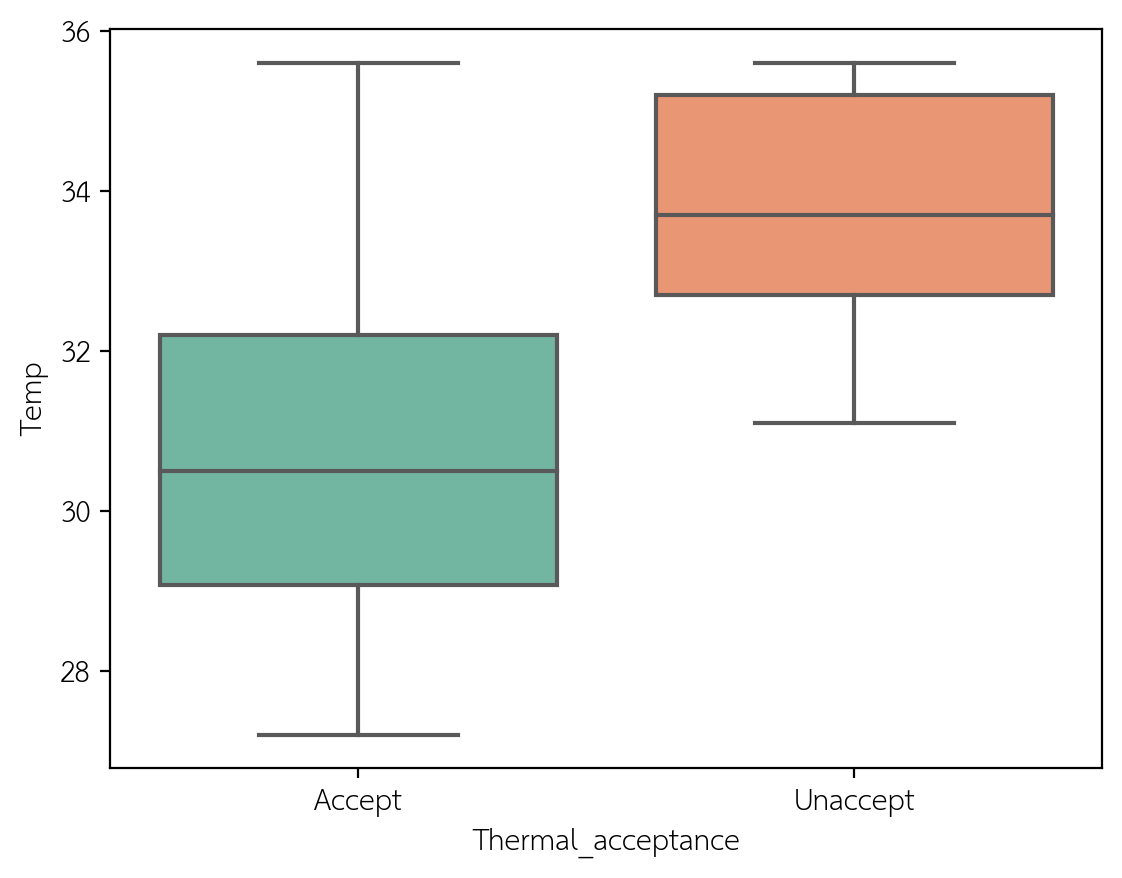

In [ ]:
# create another grouped boxplot
ax = sns.boxplot(x = data['Thermal_acceptance'],
            y = data['Temp'],
            palette = 'Set2')

In [ ]:
temp_G1 = data[data['Thermal_acceptance']=='Accept'].filter(['Temp'])
temp_G2 = data[data['Thermal_acceptance']=='Unaccept'].filter(['Temp'])

In [ ]:
##สมมติฐาน
##H0: มัธยฐานของอุณหภูมิของการยอมรับและไม่ยอมรับสภาพอากาศไม่แตกต่างกัน
##H1: มัธยฐานของอุณหภูมิของการยอมรับและไม่ยอมรับสภาพอากาศแตกต่างกัน


In [ ]:
from pingouin import mwu

results = mwu(temp_G1['Temp'], temp_G2['Temp'],
               alternative='two-sided')
results

,U-val,alternative,p-val,RBC,CLES
MWU,486.0,two-sided,4.632862e-08,0.730897,0.134551


####p-value < 0.0001 ซึ่งน้อยกว่า alpha = 0.05 จึงปฏิเสธ H0 นั่นคือ มัธยฐานของอุณหภูมิของการยอมรับและไม่ยอมรับสภาพอากาศแตกต่างกัน

###ความเร็วลม

In [ ]:
v_G1 = data[data['Thermal_acceptance']=='Accept'].filter(['V'])
v_G2 = data[data['Thermal_acceptance']=='Unaccept'].filter(['V'])

In [ ]:
##สมมติฐาน
##H0: มัธยฐานของความเร็วลม ของการยอมรับและไม่ยอมรับสภาพอากาศไม่แตกต่างกัน
##H1: มัธยฐานของความเร็วลม ของการยอมรับและไม่ยอมรับสภาพอากาศแตกต่างกัน


In [ ]:
results = mwu(v_G1['V'], v_G2['V'],
               alternative='two-sided')
results

,U-val,alternative,p-val,RBC,CLES
MWU,1872.0,two-sided,0.786139,-0.036545,0.518272


####p-value = 0.79 ซึ่งมากกว่า alpha = 0.05 จึงยอมรับ H0 นั่นคือ มัธยฐานของความเร็วลม ของการยอมรับและไม่ยอมรับสภาพอากาศไม่แตกต่างกัน

###ความชื้นสัมพัทธ์

In [ ]:
rh_G1 = data[data['Thermal_acceptance']=='Accept'].filter(['RH'])
rh_G2 = data[data['Thermal_acceptance']=='Unaccept'].filter(['RH'])

In [ ]:
##สมมติฐาน
##H0: มัธยฐานของค่า RH ของการยอมรับและไม่ยอมรับสภาพอากาศไม่แตกต่างกัน
##H1: มัธยฐานของค่า RH ของการยอมรับและไม่ยอมรับสภาพอากาศแตกต่างกัน


In [ ]:
results = mwu(rh_G1['RH'], rh_G2['RH'],
               alternative='two-sided')
results

,U-val,alternative,p-val,RBC,CLES
MWU,1207.0,two-sided,0.013209,0.331672,0.334164


####p-value = 0.013 ซึ่งน้อยกว่า alpha = 0.05 จึงปฏิเสธ H0 นั่นคือ มัธยฐานของค่า RH ของการยอมรับและไม่ยอมรับสภาพอากาศแตกต่างกัน

###TMRT

In [ ]:
tmrt_G1 = data[data['Thermal_acceptance']=='Accept'].filter(['TMRT'])
tmrt_G2 = data[data['Thermal_acceptance']=='Unaccept'].filter(['TMRT'])

In [ ]:
##สมมติฐาน
##H0: มัธยฐานของค่า TMRT ของการยอมรับและไม่ยอมรับสภาพอากาศไม่แตกต่างกัน
##H1: มัธยฐานของค่า TMRT ของการยอมรับและไม่ยอมรับสภาพอากาศแตกต่างกัน

In [ ]:
results = mwu(tmrt_G1['TMRT'], tmrt_G2['TMRT'],
               alternative='two-sided')
results

,U-val,alternative,p-val,RBC,CLES
MWU,435.5,two-sided,1.415872e-08,0.758859,0.12057


####p-value < 0.0001 ซึ่งน้อยกว่า alpha = 0.05 จึงปฏิเสธ H0 นั่นคือ มัธยฐานของค่า TMRT ของการยอมรับและไม่ยอมรับสภาพอากาศแตกต่างกัน

#ดูความสัมพันธ์

In [ ]:
data.corr()

<ipython-input-31-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,No,เพศ,Age,Weight,Height,BMI,พื้นที่ทำแบบสอบถาม,Temp,Globe temp,RH,...,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1,TMRT,Clo,Met,seasons
No,1.000000,0.315777,0.374334,-0.238190,-0.228217,-0.181233,0.202498,0.795272,0.727556,0.572413,...,0.597857,-0.269759,0.116327,0.233704,-0.257172,-0.367284,0.694301,NaN,NaN,0.821643
เพศ,0.315777,1.000000,0.214785,-0.183751,-0.822110,0.153896,0.121687,0.306044,0.295660,0.362476,...,0.202712,0.064787,0.156628,0.033309,-0.165979,-0.123698,0.284155,NaN,NaN,0.360037
Age,0.374334,0.214785,1.000000,-0.073203,-0.241685,-0.000254,0.336485,0.430778,0.362495,0.465773,...,0.349738,-0.054615,0.022939,-0.000470,-0.176629,-0.133049,0.338733,NaN,NaN,0.533766
Weight,-0.238190,-0.183751,-0.073203,1.000000,0.435320,0.902318,-0.004725,-0.159710,-0.163418,-0.185852,...,-0.118839,0.201544,-0.052790,-0.039278,0.102273,-0.129440,-0.160025,NaN,NaN,-0.189423
Height,-0.228217,-0.822110,-0.241685,0.435320,1.000000,0.021613,-0.073794,-0.219840,-0.224340,-0.267454,...,-0.132877,-0.049925,-0.096299,-0.001765,0.071417,-0.028963,-0.219627,NaN,NaN,-0.244442
BMI,-0.181233,0.153896,-0.000254,0.902318,0.021613,1.000000,0.014273,-0.095135,-0.091908,-0.097345,...,-0.098333,0.256826,-0.008517,-0.034317,0.078835,-0.124111,-0.089091,NaN,NaN,-0.123061
พื้นที่ทำแบบสอบถาม,0.202498,0.121687,0.336485,-0.004725,-0.073794,0.014273,1.000000,0.232715,0.214531,0.406311,...,0.056382,-0.095911,0.028434,-0.060257,-0.101298,-0.110185,0.201646,NaN,NaN,0.428306
Temp,0.795272,0.306044,0.430778,-0.159710,-0.219840,-0.095135,0.232715,1.000000,0.945751,0.421476,...,0.741997,-0.324496,-0.004008,0.163056,-0.500927,-0.400809,0.911245,NaN,NaN,0.833830
Globe temp,0.727556,0.295660,0.362495,-0.163418,-0.224340,-0.091908,0.214531,0.945751,1.000000,0.320776,...,0.723730,-0.351213,-0.022366,0.144774,-0.554210,-0.436655,0.993875,NaN,NaN,0.720246
RH,0.572413,0.362476,0.465773,-0.185852,-0.267454,-0.097345,0.406311,0.421476,0.320776,1.000000,...,0.399509,-0.109622,0.079167,0.052697,-0.238224,-0.232827,0.279872,NaN,NaN,0.795757


In [ ]:
cols = ['เพศ','Age', 'BMI', 'พื้นที่ทำแบบสอบถาม', 'Temp', 'RH', 'V', 'TMRT', 'seasons','Clo','Met',
        'อุณหภูมิ', 'ความชื้น', 'กระแสลม', 'ความแรงของแสงแดด', 'เหงื่อบริเวณผิวหนัง', 'ความร้อน',
        'ความชื้น.1',   'กระแสลม.1',  'แสงแดด', 'เหงื่อบริเวณผิวหนัง.1' ]

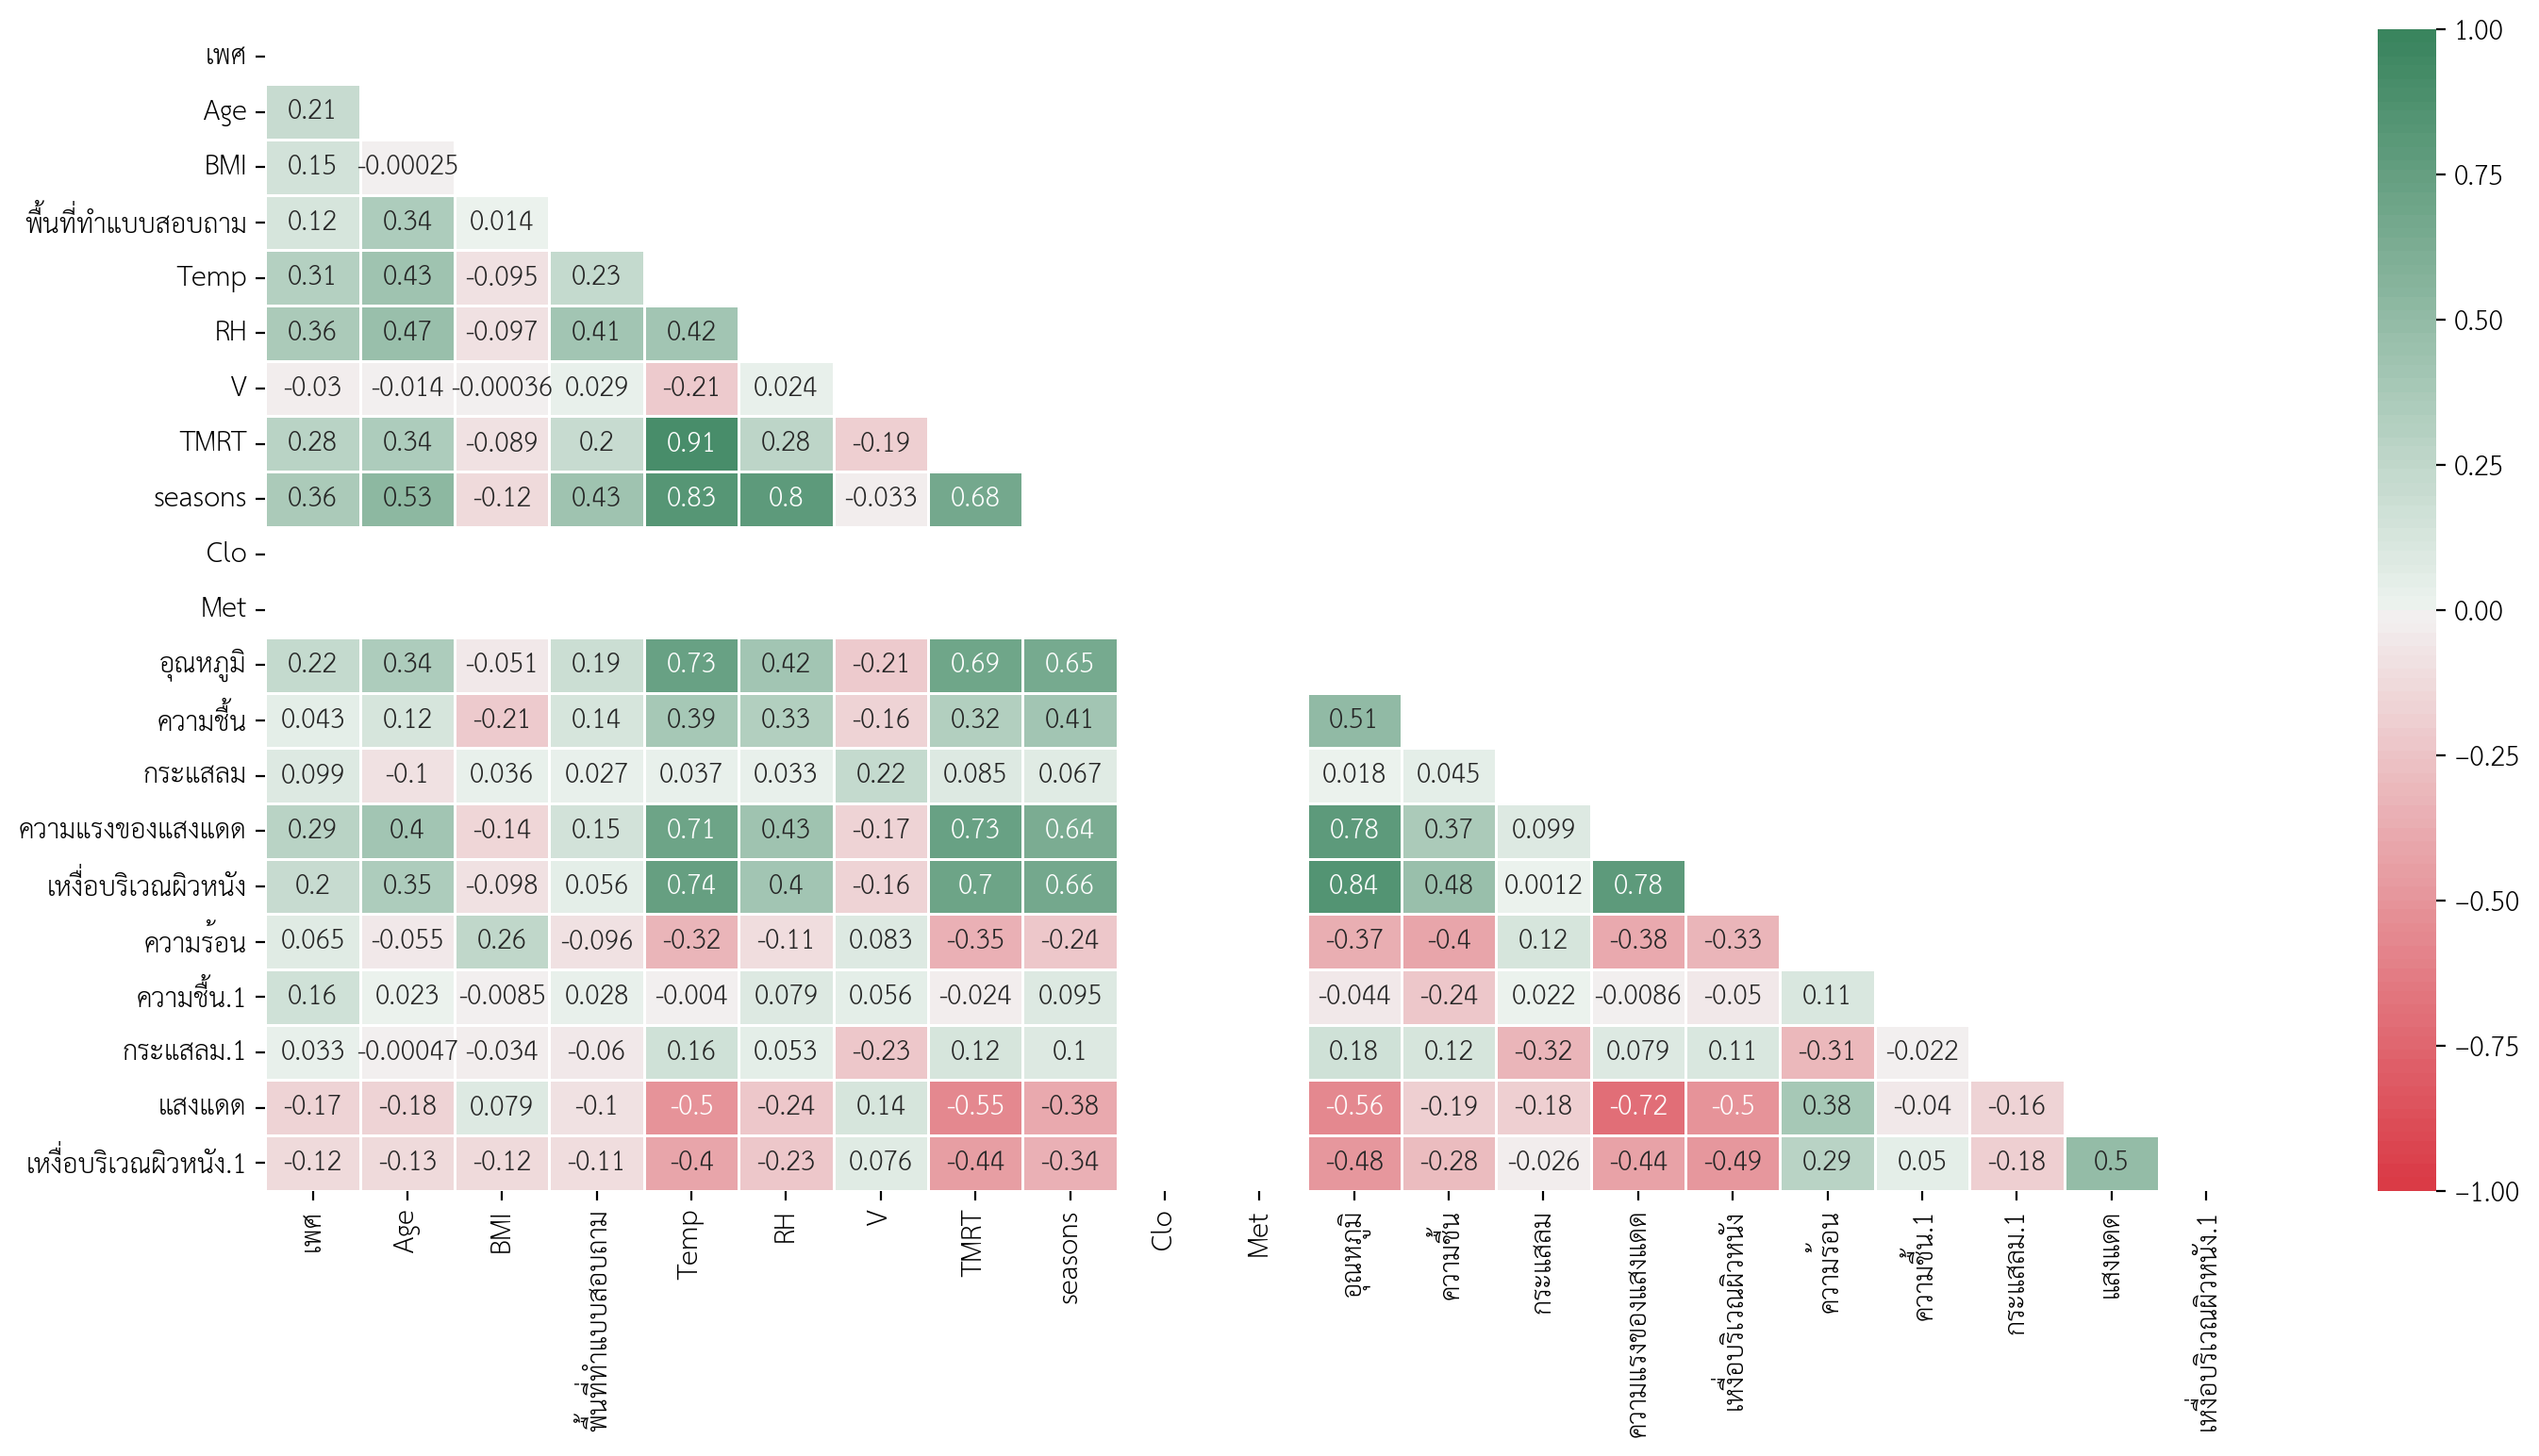

In [ ]:
dcorr=data[cols].corr()
# dcorr

mask = np.zeros_like(dcorr)
# mask.shape
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(17,8))
sns.heatmap(dcorr, cmap=sns.diverging_palette(10, 145, n=100),
            vmin=-1, vmax=1, center=0, linewidths=1, annot=True, mask=mask, ax=ax);

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   No                      193 non-null    int64         
 1   Date                    193 non-null    datetime64[ns]
 2   เพศ                     193 non-null    int64         
 3   Age                     193 non-null    int64         
 4   Weight                  193 non-null    float64       
 5   Height                  193 non-null    float64       
 6   BMI                     193 non-null    float64       
 7   พื้นที่ทำแบบสอบถาม      193 non-null    int64         
 8   เวลา                    193 non-null    object        
 9   Temp                    193 non-null    float64       
 10  Globe temp              193 non-null    float64       
 11  RH                      193 non-null    float64       
 12  V                       193 non-null    float64   

#Spitt Data

In [ ]:
# Define the feature matrix X and the target y

X=data[cols]
y = data['Thermal_acceptance']
y2 = data['Thermal_sensation_Vote']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, y2_train, y2_test = train_test_split(X, y,y2, test_size=0.3, random_state=42)

#PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
#Scale Data โดย Standardization
scaler = StandardScaler()
X_t = scaler.fit_transform(X)

In [ ]:
X_t.shape

(193, 21)

In [ ]:
pca = PCA(n_components=X_t.shape[1])
#pca = PCA(n_components=)

pca.fit_transform(X_t)
print(f'explained_variance (n_components={pca.n_components}) = {pca.explained_variance_}') # Eigenvalues
print(f'explained_variance_ratio (n_components={pca.n_components}) = {pca.explained_variance_ratio_}')
print(f'sum explained_variance_ratio = {np.sum(pca.explained_variance_ratio_)}')

explained_variance (n_components=21) = [6.66886017e+00 1.96837648e+00 1.45363242e+00 1.35187835e+00
 1.10524986e+00 9.84748101e-01 8.62228501e-01 8.02203332e-01
 7.04352365e-01 6.24142018e-01 5.71606083e-01 5.21237183e-01
 4.33291747e-01 3.84524573e-01 2.77091642e-01 1.48754294e-01
 1.31522877e-01 8.62079572e-02 1.90503797e-02 7.37293291e-33
 5.83080093e-34]
explained_variance_ratio (n_components=21) = [3.49174026e-01 1.03061981e-01 7.61105600e-02 7.07828315e-02
 5.78696411e-02 5.15603042e-02 4.51453156e-02 4.20024651e-02
 3.68790985e-02 3.26793748e-02 2.99286523e-02 2.72913933e-02
 2.26866691e-02 2.01332746e-02 1.45082070e-02 7.78860771e-03
 6.88639008e-03 4.51375178e-03 9.97456477e-04 3.86038483e-34
 3.05294185e-35]
sum explained_variance_ratio = 1.0


In [ ]:
def scree_plot(X, n_components, with_cumulative=False, show_data_label=False, figsize=(10, 7)):
    '''
    PCA scree plot with cumulative
    '''
    scaler = StandardScaler()
    X_t=scaler.fit_transform(X)

    max_components = min(X.shape)
    x=np.arange(1, n_components+1)
    pca = PCA(n_components=max_components)
    pca.fit_transform(X_t)
    y1=pca.explained_variance_ratio_[:n_components]
    y2=np.cumsum(pca.explained_variance_ratio_)[:n_components]

    plt.figure(figsize=figsize)

    if n_components > 20:
        marker = None
    else:
        marker = 'o'
    if with_cumulative:
        plt.plot(x, y2, linestyle='--', marker=marker, label='cumulative', color='salmon')

    plt.plot(x, y1, linestyle='-', marker=marker, label='individual', color='deepskyblue')
    plt.title('explained variance ratio')
    plt.xlabel('# of components')
    plt.ylabel('proportion of variance explained')
    plt.legend()
    if with_cumulative:
        [plt.axhline(y=xl, color='.7', linestyle='--') for xl in [.8, .9, .95, 1]]
    plt.grid(axis='x')

    if show_data_label:
        for n, v, cv in zip(np.nditer(x, flags=['refs_ok']),
                            np.nditer(y1, flags=['refs_ok']),
                            np.nditer(y2, flags=['refs_ok'])):
                plt.text(n+.02, v+.02, f'{v*100:.2f}%', fontsize=10)
                if with_cumulative:
                    plt.text(n+.02, cv+.02, f'{cv*100:.2f}%', fontsize=10)


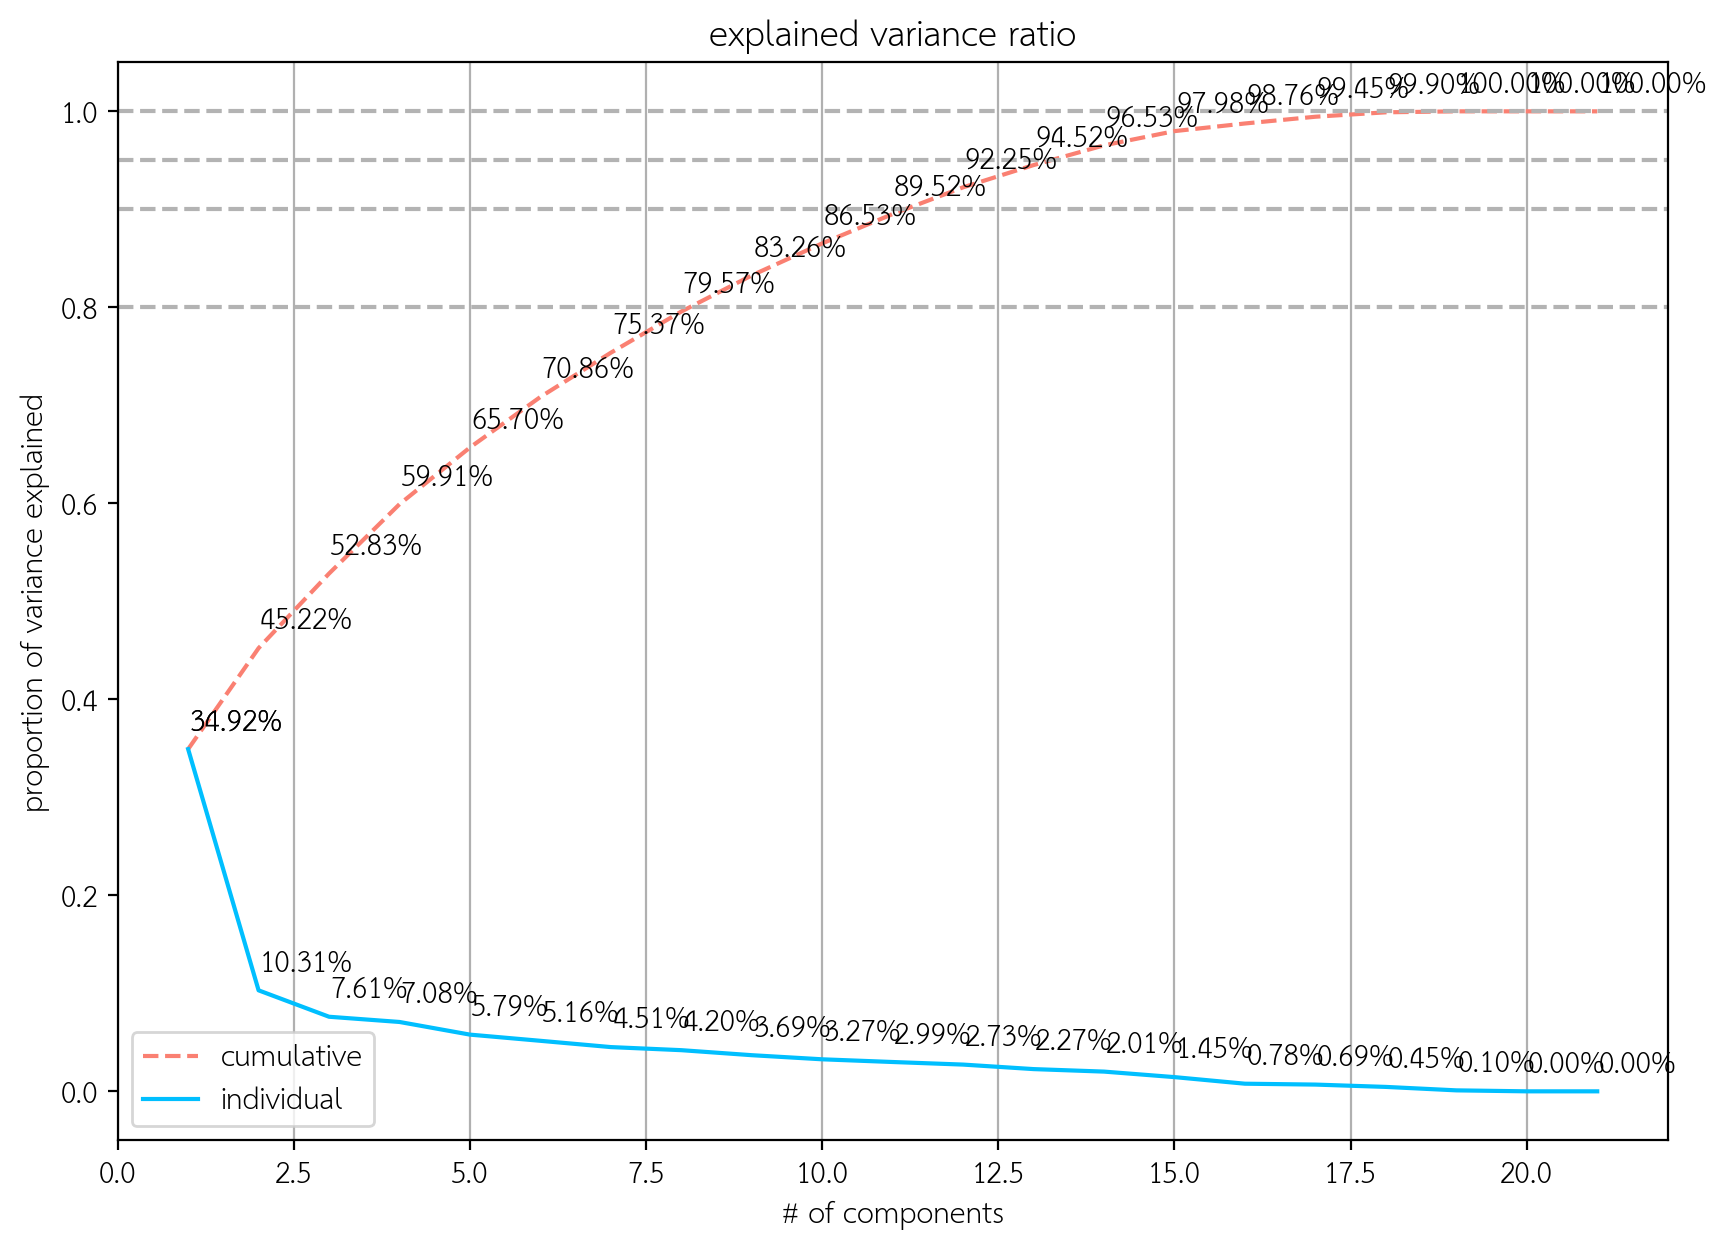

In [ ]:
scree_plot(X, 21, True, True)

###PC1 อธิบาย var ได้ 34.92%
###PC2 อธิบาย var ได้ 45.22%
###PC3 อธิบาย var ได้ 52.83%
###PC4 อธิบาย var ได้ 59.91%
###PC5 อธิบาย var ได้ 65.70%
###PC6 อธิบาย var ได้ 70.86%
###PC7 อธิบาย var ได้ 75.37%
###PC8 อธิบาย var ได้ 79.57%
###PC9 อธิบาย var ได้ 83.26%

#PCA Loading

In [ ]:
pca.components_ # Eigenvectors

array([[ 1.35522799e-01,  1.93384541e-01, -5.04056635e-02,
         1.21407326e-01,  3.45258194e-01,  2.33091440e-01,
        -7.79680533e-02,  3.26636164e-01,  3.31430175e-01,
         0.00000000e+00,  0.00000000e+00,  3.37918764e-01,
         2.07672737e-01,  1.84522128e-02,  3.37002035e-01,
         3.30638350e-01, -1.76256109e-01, -6.94793071e-03,
         7.76918116e-02, -2.56265486e-01, -2.17789764e-01],
       [ 3.13230867e-01,  2.85851297e-01,  1.59951592e-01,
         3.12978750e-01,  1.87670043e-02,  3.30679518e-01,
         2.81647429e-01, -3.59015806e-02,  2.44450502e-01,
        -1.08420217e-19, -0.00000000e+00, -9.10755308e-02,
        -1.88726483e-01,  2.32189864e-01, -3.35831167e-02,
        -9.06385568e-02,  3.61465100e-01,  2.47209979e-01,
        -3.39973949e-01,  1.21055278e-01,  1.31869851e-01],
       [ 4.45531764e-02, -2.88202577e-01,  1.87774672e-01,
        -2.97472015e-01,  1.26192971e-02, -2.81652417e-01,
         1.69762053e-01,  1.39749772e-01, -1.65600801e

In [ ]:
dpc=pd.DataFrame(pca.components_.T,
                  index=cols,
                  columns=[f'PC{n+1}' for n in range(pca.components_.shape[0])]).round(4) #Eigenvectors
# dpc
dpc.style.applymap(lambda e: 'background-color: yellow' if np.abs(e) > .5 else 'background-color: white')

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
เพศ,0.135500,0.313200,0.044600,-0.331900,-0.021900,0.065100,0.550900,0.080600,0.395500,-0.038500,0.466100,-0.130500,-0.134100,0.171900,0.069900,-0.065100,-0.077200,-0.039600,-0.018600,0.000000,-0.000000
Age,0.193400,0.285900,-0.288200,-0.037000,0.085700,0.092500,-0.411100,0.186000,0.131000,-0.299900,-0.039000,0.399900,-0.531500,0.127200,-0.000900,-0.080800,-0.030900,0.045400,-0.012600,-0.000000,-0.000000
BMI,-0.050400,0.160000,0.187800,-0.497100,0.545600,-0.230400,-0.043700,0.020300,-0.135300,0.216800,0.043700,0.419900,0.193800,-0.177100,-0.130700,0.080400,-0.005800,0.016900,-0.006600,0.000000,-0.000000
พื้นที่ทำแบบสอบถาม,0.121400,0.313000,-0.297500,0.158600,0.162600,-0.339100,-0.195800,-0.581000,0.069400,0.181500,0.088300,-0.153300,0.144500,0.353300,0.124800,0.103300,-0.105800,0.003600,0.064400,-0.000000,0.000000
Temp,0.345300,0.018800,0.012600,-0.058800,-0.019400,0.183900,-0.084900,0.006900,0.116900,0.379900,-0.148600,-0.106800,-0.089900,-0.164300,-0.191500,-0.120700,-0.048900,-0.373000,0.645100,0.000000,-0.000000
RH,0.233100,0.330700,-0.281700,0.107100,0.007700,-0.116600,0.274200,0.065800,-0.140000,-0.342900,-0.143300,-0.047200,0.254900,-0.430500,0.015900,-0.020600,0.084000,0.385800,0.292300,0.000000,0.000000
V,-0.078000,0.281600,0.169800,0.339700,-0.105900,-0.452500,-0.085300,0.629400,0.113500,0.231700,0.008100,-0.031100,0.122000,0.213900,-0.137200,-0.006800,0.032300,0.017900,0.051000,-0.000000,-0.000000
TMRT,0.326600,-0.035900,0.139700,-0.070800,-0.036700,0.149200,-0.163100,-0.048800,0.205900,0.400900,-0.046600,-0.179100,-0.124600,-0.077700,-0.158500,0.063400,0.172600,0.664100,-0.236600,-0.000000,0.000000
seasons,0.331400,0.244500,-0.165600,0.069100,-0.036400,0.017300,0.072900,0.047200,-0.042800,0.136600,-0.199600,-0.071700,0.079000,-0.289600,-0.072100,-0.005600,-0.050900,-0.449100,-0.651100,0.000000,-0.000000
Clo,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.907900,0.419100


###ตัวแปรที่มี weight มากใน PC1 คือ อุณหภูมิและความแรงของแสงแดด
###ตัวแปรที่มี weight มากใน PC2 คือ  ความร้อน
###ตัวแปรที่มี weight มากใน PC3 คือ กระแสลม
###ตัวแปรที่มี weight มากใน PC4 คือ BMI
###ตัวแปรที่มี weight มากใน PC5 คือ BMI และความชื้น.1
###ตัวแปรที่มี weight มากใน PC6 คือ ความเร็วลมและเหงื่อบริเวณผิวหนัง
###ตัวแปรที่มี weight มากใน PC7 คือ เพศ
###ตัวแปรที่มี weight มากใน PC8 คือ พื้นที่ทำแบบสอบถามและความเร็วลม
###ตัวแปรที่มี weight มากใน PC9 คือ ความชื้น.1

##TA

In [ ]:
#plot PC1 and PC2
# pca = PCA(n_components=X.shape[1])
pca = PCA(n_components=2)

X_pca=pca.fit_transform(X_t)
print(f'explained_variance (n_components={pca.n_components}) = {pca.explained_variance_}')
print(f'explained_variance_ratio (n_components={pca.n_components}) = {pca.explained_variance_ratio_}')
print(f'sum explained_variance_ratio = {np.sum(pca.explained_variance_ratio_)}')

explained_variance (n_components=2) = [6.66886017 1.96837648]
explained_variance_ratio (n_components=2) = [0.34917403 0.10306198]
sum explained_variance_ratio = 0.4522360067701023


In [ ]:
ta=pd.concat([pd.DataFrame(pca.transform(X_t),
                           columns=[f'PC{n}' for n in range(1, pca.n_components_ + 1)]),
              data[['Thermal_acceptance']]], axis = 'columns')
ta

,PC1,PC2,Thermal_acceptance
0,-1.070057,-0.524707,Accept
1,-0.907202,0.262732,Accept
2,-2.067256,1.759461,Accept
3,-0.485281,-0.271275,Accept
4,-1.141075,-0.410290,Accept
...,...,...,...
188,2.535096,1.306085,Accept
189,2.994482,0.840974,Unaccept
190,3.614092,-1.086234,Accept
191,2.567310,1.368959,Accept


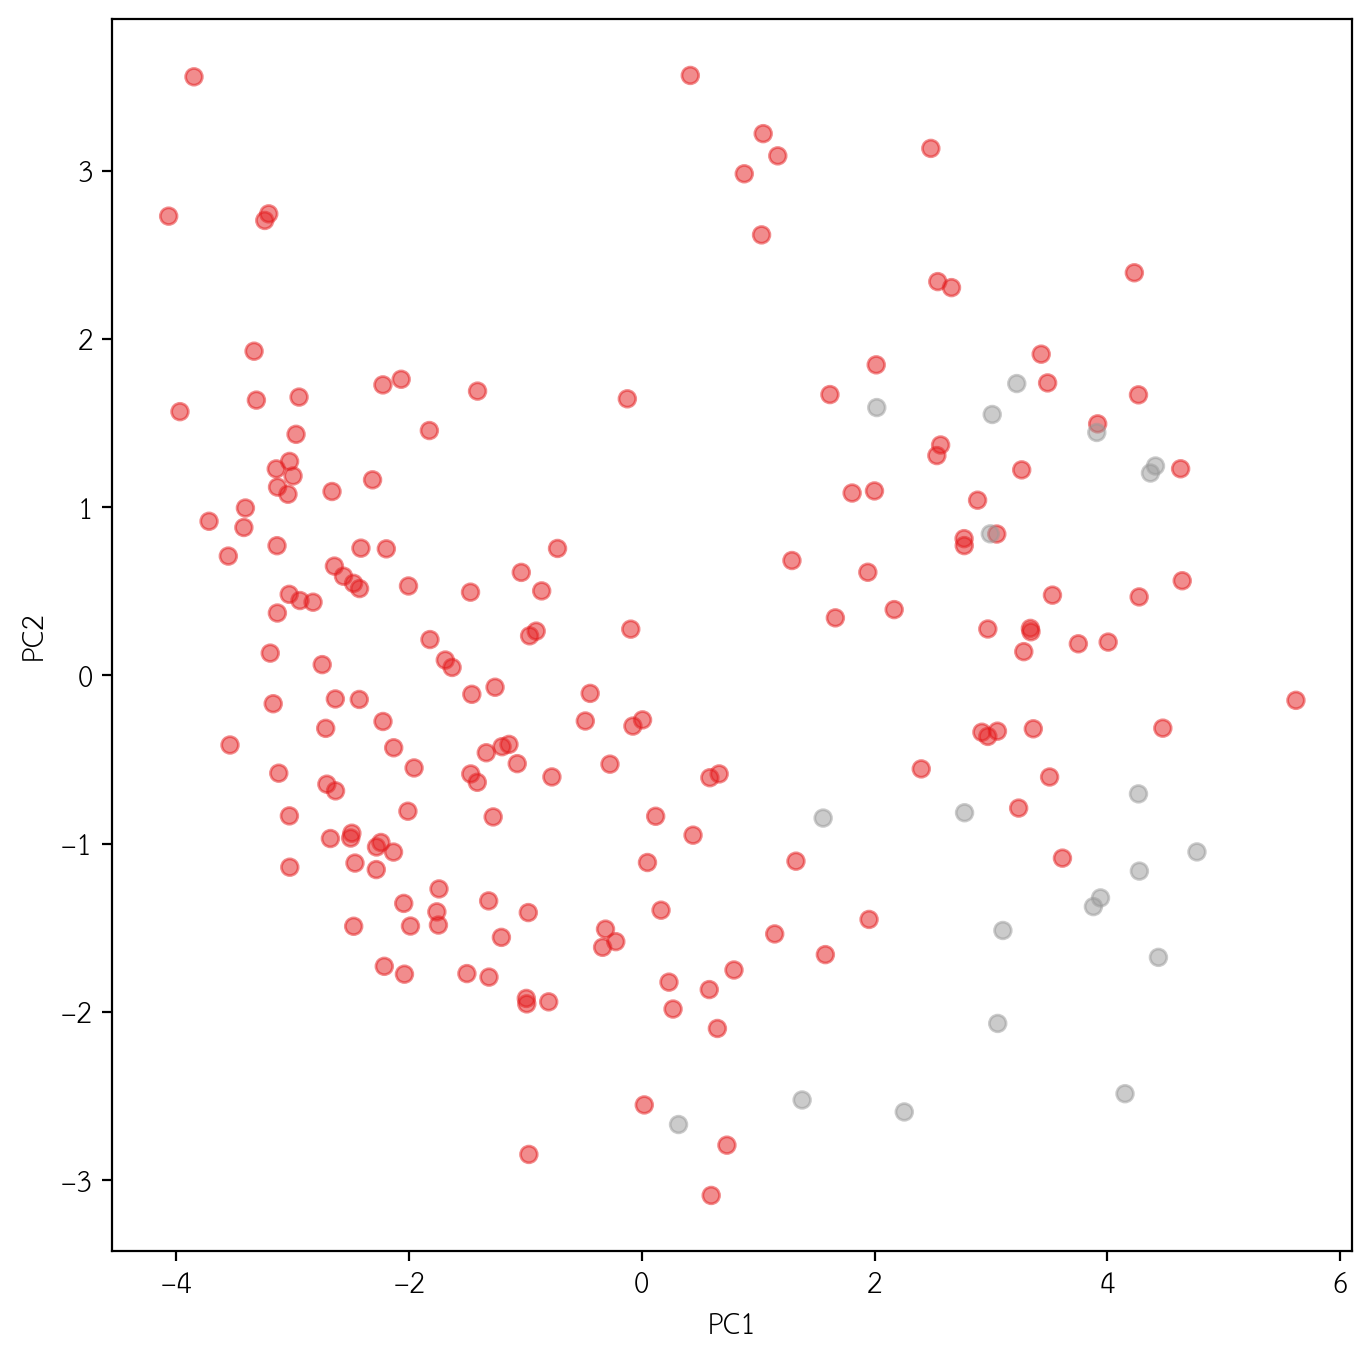

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.scatter(X_pca[:, 0], X_pca[:, 1], alpha=.5, cmap='Set1', c=data.Thermal_acceptance.astype('category').cat.codes)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2');

In [ ]:
#3D Plot PC1 PC2 PC3
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# pca = PCA(n_components=X.shape[1])
pca = PCA(n_components=3)

X_pca=pca.fit_transform(X_t)
print(f'explained_variance (n_components={pca.n_components}) = {pca.explained_variance_}')
print(f'explained_variance_ratio (n_components={pca.n_components}) = {pca.explained_variance_ratio_}')
print(f'sum explained_variance_ratio = {np.sum(pca.explained_variance_ratio_)}')

explained_variance (n_components=3) = [6.66886017 1.96837648 1.45363242]
explained_variance_ratio (n_components=3) = [0.34917403 0.10306198 0.07611056]
sum explained_variance_ratio = 0.5283465668172691


In [ ]:
 #switch to interactive matplotlib

#%matplotlib qt
#%pylab qt
# switch back to inline mode
#%matplotlib inline

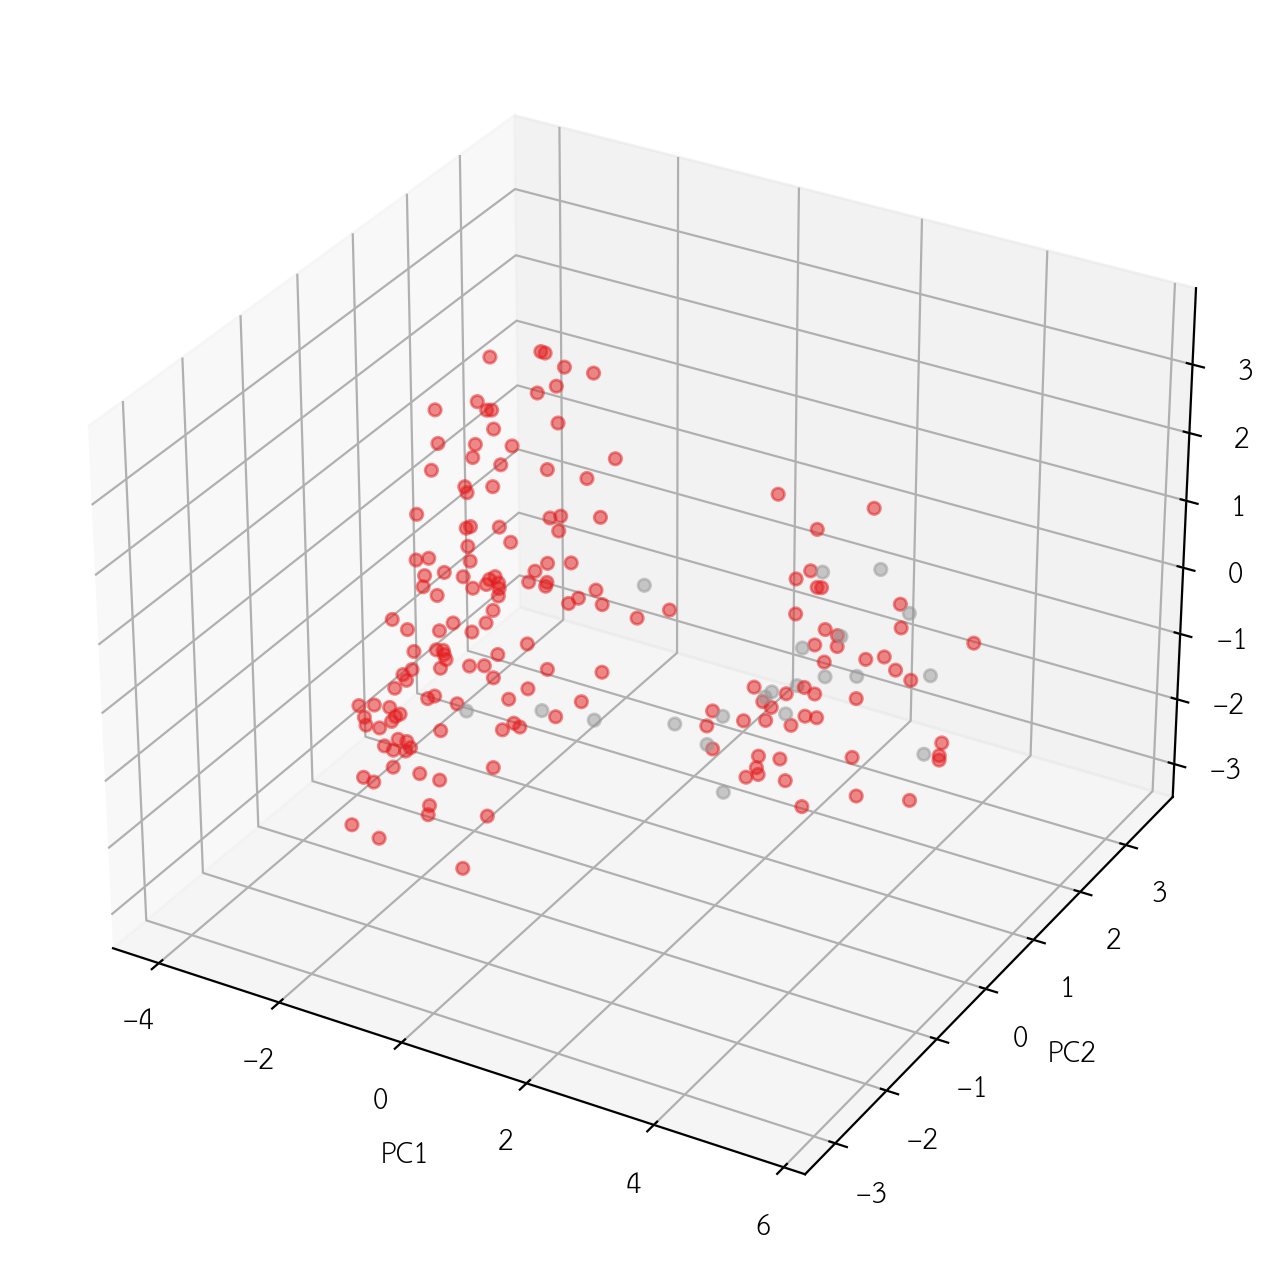

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], alpha=.5, cmap='Set1', c=data.Thermal_acceptance.astype('category').cat.codes)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3');

#TSV

In [ ]:
# pca = PCA(n_components=X.shape[1])
pca = PCA(n_components=2)

X_pca=pca.fit_transform(X_t)
print(f'explained_variance (n_components={pca.n_components}) = {pca.explained_variance_}')
print(f'explained_variance_ratio (n_components={pca.n_components}) = {pca.explained_variance_ratio_}')
print(f'sum explained_variance_ratio = {np.sum(pca.explained_variance_ratio_)}')

explained_variance (n_components=2) = [6.66886017 1.96837648]
explained_variance_ratio (n_components=2) = [0.34917403 0.10306198]
sum explained_variance_ratio = 0.4522360067701023


In [ ]:
tsv=pd.concat([pd.DataFrame(pca.transform(X_t),
                           columns=[f'PC{n}' for n in range(1, pca.n_components_ + 1)]),
              data[['Thermal_sensation_Vote']]], axis = 'columns')
tsv

,PC1,PC2,Thermal_sensation_Vote
0,-1.070057,-0.524707,0
1,-0.907202,0.262732,-1
2,-2.067256,1.759461,-1
3,-0.485281,-0.271275,-1
4,-1.141075,-0.410290,-1
...,...,...,...
188,2.535096,1.306085,0
189,2.994482,0.840974,0
190,3.614092,-1.086234,1
191,2.567310,1.368959,1


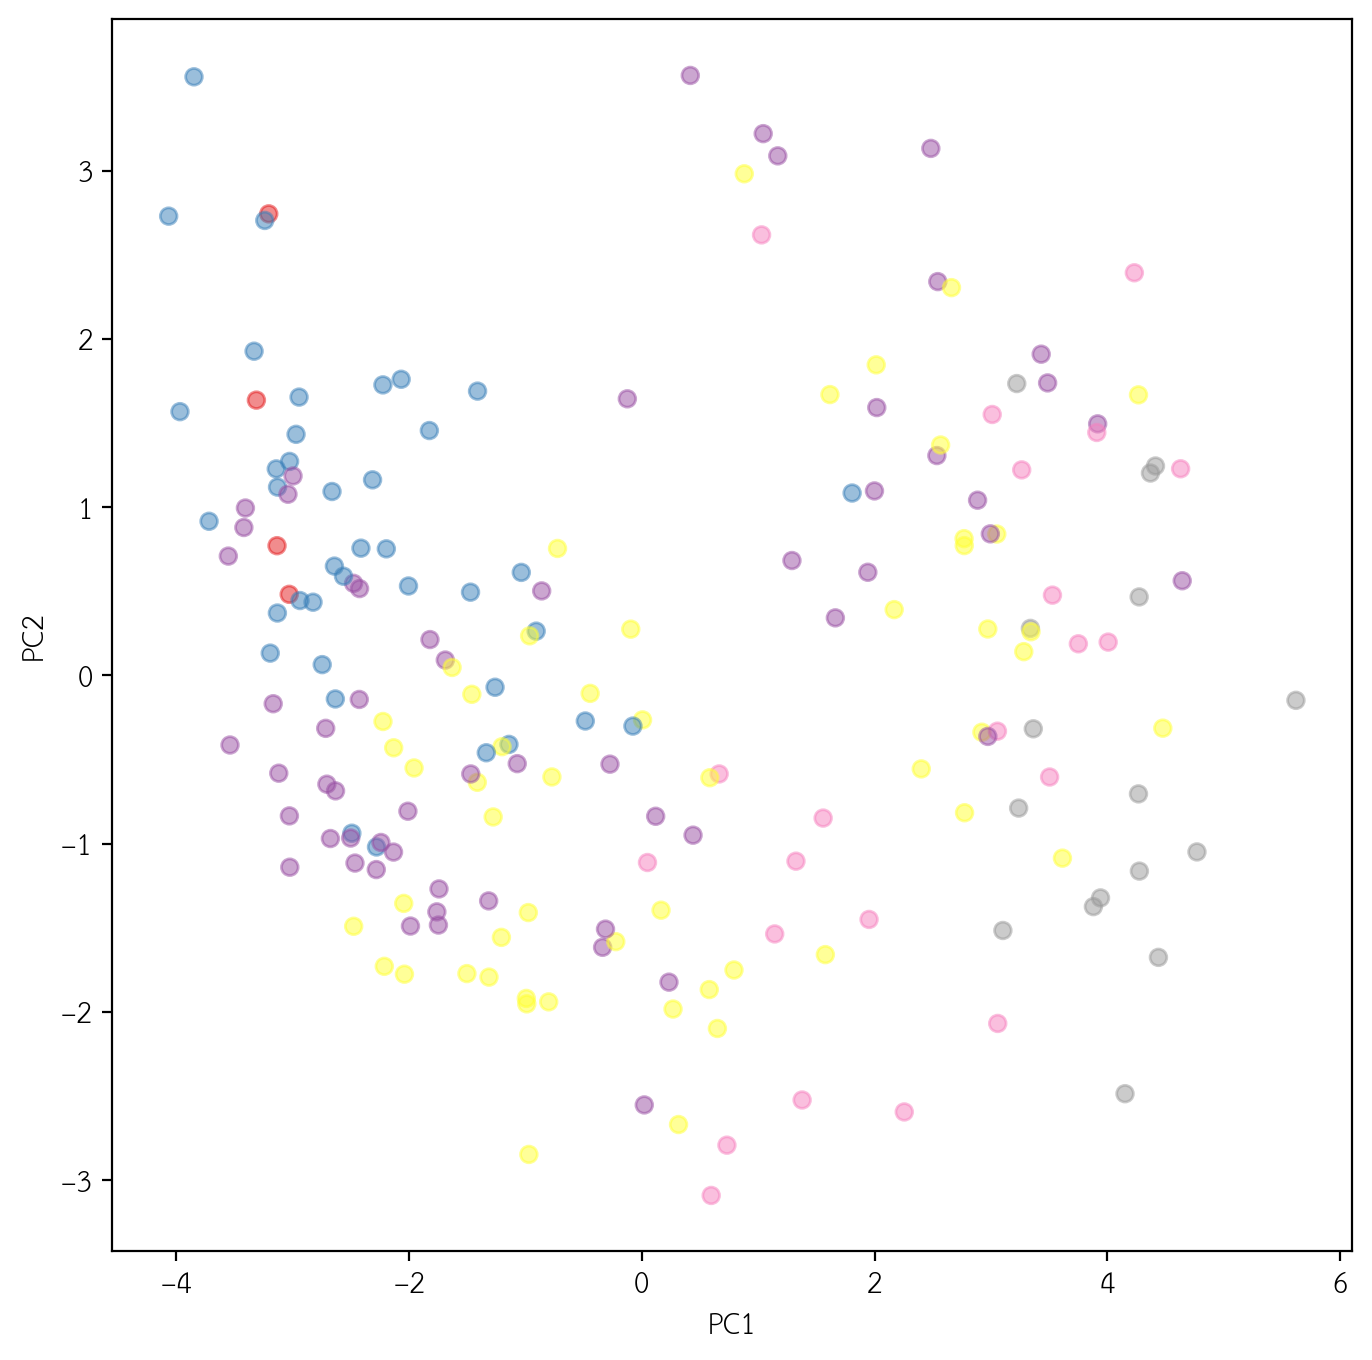

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.scatter(X_pca[:, 0], X_pca[:, 1], alpha=.5, cmap='Set1', c=data.Thermal_sensation_Vote.astype('category').cat.codes)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2');

In [ ]:
# pca = PCA(n_components=X.shape[1])
pca = PCA(n_components=3)

X_pca=pca.fit_transform(X_t)
print(f'explained_variance (n_components={pca.n_components}) = {pca.explained_variance_}')
print(f'explained_variance_ratio (n_components={pca.n_components}) = {pca.explained_variance_ratio_}')
print(f'sum explained_variance_ratio = {np.sum(pca.explained_variance_ratio_)}')

explained_variance (n_components=3) = [6.66886017 1.96837648 1.45363242]
explained_variance_ratio (n_components=3) = [0.34917403 0.10306198 0.07611056]
sum explained_variance_ratio = 0.5283465668172691


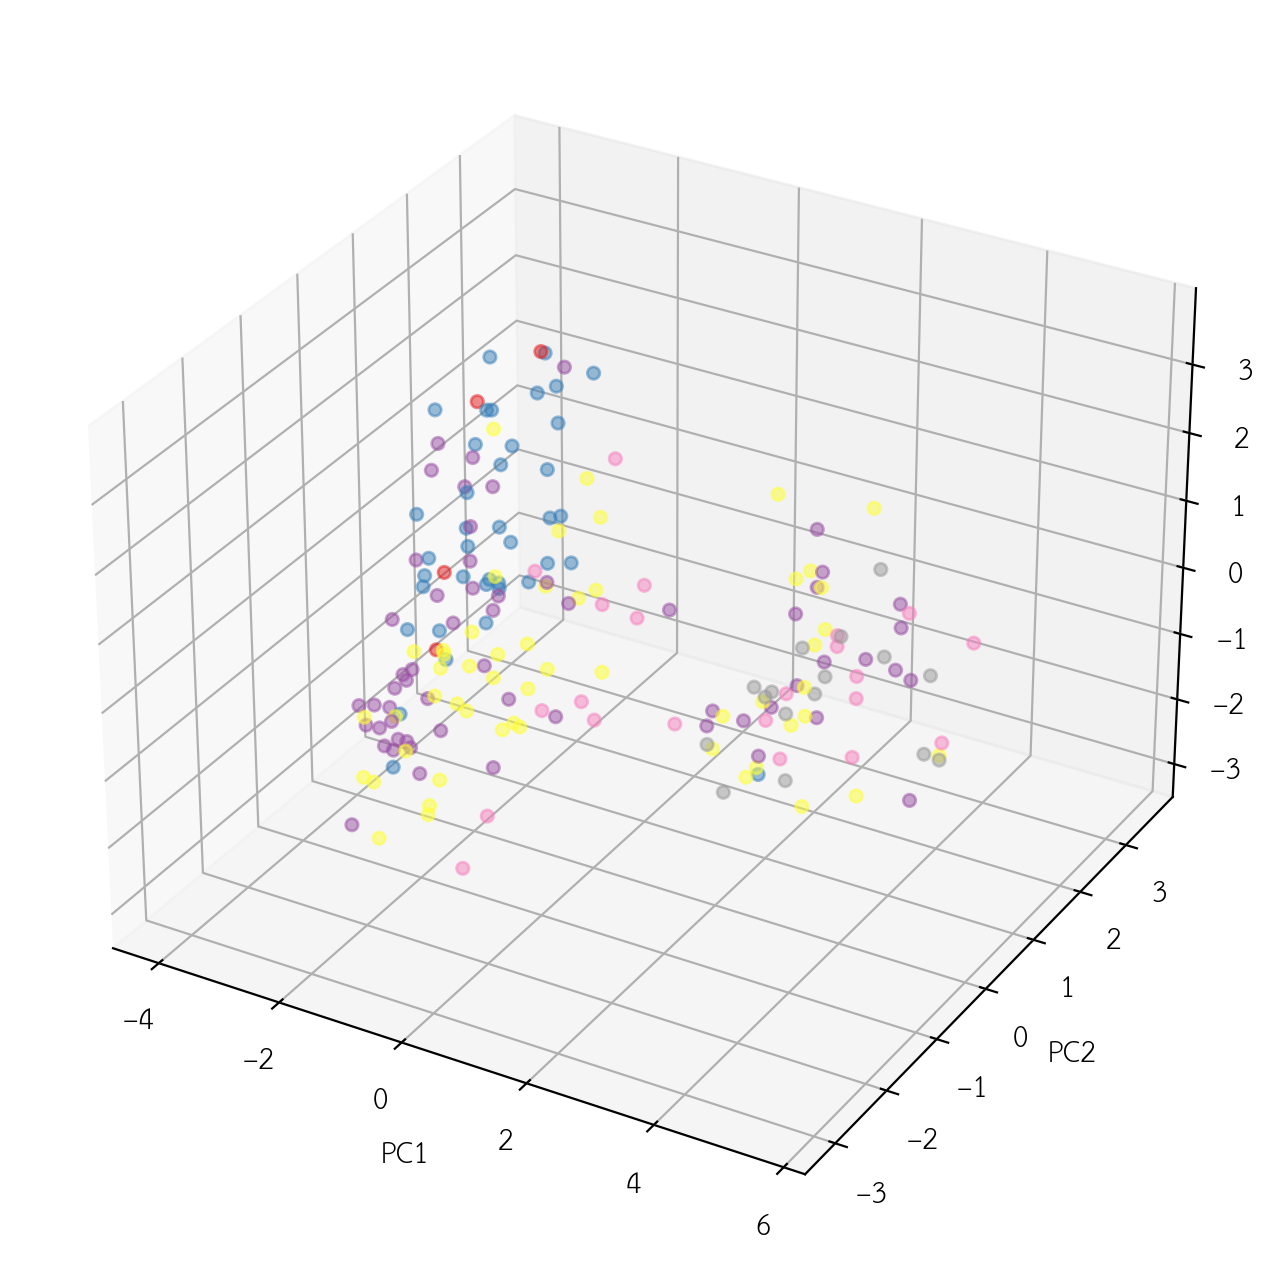

In [ ]:
#3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], alpha=.5, cmap='Set1', c=data.Thermal_sensation_Vote.astype('category').cat.codes)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3');

#Biplot

In [ ]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

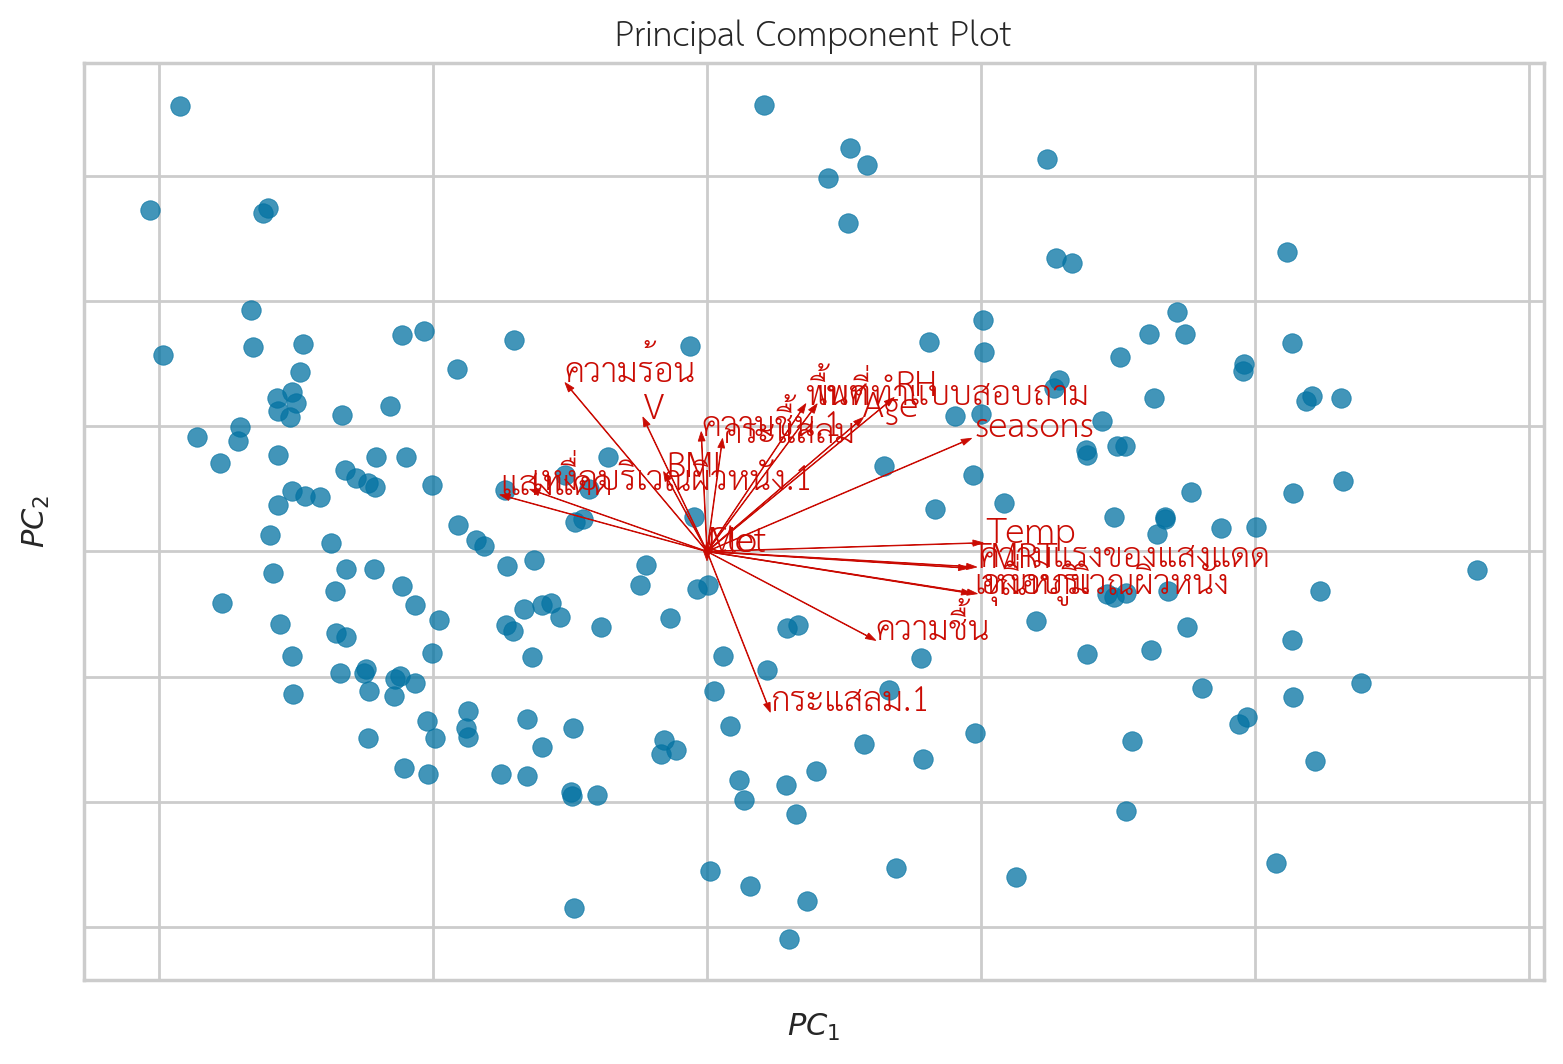

<Axes: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [ ]:
# pip install yellowbrick
import yellowbrick.features as yb
visualizer = yb.PCA(scale=True, proj_features=True, proj_dim=2)
visualizer.fit_transform(X)
visualizer.show()

###PC1 มีตัวแปร เพศ temp tmrt อุณหภูมิ เหงื่อบริเวณผิวหนัง แสงแดด ความชื้น เหงื่อบริเวณผิวหนัง.1 ฤดูกาล
###PC2 มีตัวแปร กระแสลม.1 ความร้อน คามเร็วลม ความชื้น.1 กระแสลม พื้นที่ทำแบบสอบถาม ความชื้นสัมพัท bmi อายุ

In [ ]:
#pca = PCA(n_components=X_train_sc.shape[1])
pca = PCA(n_components=2)

pca.fit_transform(X_t)
print(f'explained_variance (n_components={pca.n_components}) = {pca.explained_variance_}') # Eigenvalues
print(f'explained_variance_ratio (n_components={pca.n_components}) = {pca.explained_variance_ratio_}')
print(f'sum explained_variance_ratio = {np.sum(pca.explained_variance_ratio_)}')

explained_variance (n_components=2) = [6.66886017 1.96837648]
explained_variance_ratio (n_components=2) = [0.34917403 0.10306198]
sum explained_variance_ratio = 0.4522360067701023


In [ ]:
dpc=pd.DataFrame(pca.components_.T,
                  index=cols,
                  columns=[f'PC{n+1}' for n in range(pca.components_.shape[0])]).round(4) #Eigenvectors
# dpc
dpc.style.applymap(lambda e: 'background-color: yellow' if np.abs(e) > .5 else 'background-color: white')

,PC1,PC2
เพศ,0.135500,0.313200
Age,0.193400,0.285900
BMI,-0.050400,0.160000
พื้นที่ทำแบบสอบถาม,0.121400,0.313000
Temp,0.345300,0.018800
RH,0.233100,0.330700
V,-0.078000,0.281600
TMRT,0.326600,-0.035900
seasons,0.331400,0.244500
Clo,0.000000,-0.000000
